<a href="https://colab.research.google.com/github/hdvianna/explorando-as-relacoes-entre-teste-covid19-e-contagio-no-brasil/blob/main/Projeto_M%C3%B3dulo_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explorando as Relações entre Teste Covid19 e Contágio no Brasil

## Resumo

Em março de 2020 a Organização Mundial de Saúde classificou como pandemia a situação de contágio do novo Corona vírus (SARS-Cov2). Como ainda não existem meios imunizatórios de controle deste vírus, as estratégias de combate a sua progressão consistem no isolamento social e identificação antecipada de pacientes portadores do vírus (testagem). O presente estudo utilizou Tabela Saúde da Pesquisa Nacional por Amostras de Domícilios (PNAD COVID 19) e a Tabela Casos do portal Brasil.io COVID-19 para estudar as relações entre testagem de indivíduos em nível estadual e o contágio mensal por Sars-Cov2, tendo como ideia primária avaliar se a testagem possui efeito na redução ou desaceleração de casos de contágio de SARS-Cov2 nas unidades federativas brasileiras. Diferentemente da validação da hipótese de desaceleração, a análise de progressão dos dados de testagem e o resultado do teste de correlação Person indicando forte correlação (maior que 0.7) entre as variáveis Teste Mês Anterior por 100 mil Habitantes e Total de Casos por 100 mil habitantes sugere que o aumento da testagem é associado a identificação de uma maior quantidade de contágios. Assim, a ausência de testes pode estar mascarando a realidade onde a quantidade de casos reais de contágio seria maior. 

## Introdução

Em 26 de fevereiro 2020 o Brasil confirmou seu primeiro caso do novo Corona vírus, ou SARS-Cov2 [1], em um habitante da cidade de São Paulo que havia voltado de uma viagem à Itália [2]. Semanas depois, no dia 11 de março de 2020 a Organização Mundial de Saúde (OMS) elevou estado de contaminação do SARS-Cov2 para pandemia, devido ao seu rápido nível de contágio e propagação [3].

Devido a ausência de vacinas com poder imunizatório que possam enfraquecer o contágio do SARS-Cov2, a OMS apresentou uma lista de estratégias a serem adotadas como plano de resposta para o combate ao vírus, entre estas estratégias encontram-se o isolamento social e identificação antecipada de pacientes portadores do vírus (testagem) [4].

A ideia primária deste estudo é avaliar se a testagem possui efeito na redução ou desaceleração de casos de contágio de SARS-Cov2 nas unidades federativas brasileiras. Embora a testagem não tenha efeito direto
sob o vírus e sua transmissão, ela pode provocar um efeito comportamental em rede nos indivíduos que testam positivo. Isto é, um indivíduo que testa positivo terá que manter-se sob cuidado e isolamento social, assim como aqueles com quem ele manteve contato durante a janela de contágio, que é em média sete dias após o início dos sintomas [5].

Assim, a hipótese sugerida neste estudo é que a testagem deve estar relacionada a uma redução ou amortecimento no contágio de SARS-Cov2. O objetivo secundário deste estudo é avaliar a relação entre os diferentes tipos de testagem e o contágio de SARS-Cov2 nas unidades federativas brasileiras.

## Metodologia

Este estuado utilizará a Tabela Saúde da Pesquisa Nacional por Amostras de Domícilios (PNAD COVID 19) [6] e a Tabela Casos do portal Brasil.io COVID-19 [7] para estudar as relações entre testagem de indivíduos em nível estadual e o contágio mensal por Sars-Cov2. Esta seção aborda as etapas de transformação e limpeza de dados necessárias para consolidação das informações necessárias para atingir os objetivos deste estudo.

### Fontes de dados utilizadas
- Pesquisa Nacional por Amostras de Domícilios - PNAD COVID 19, Tabela Saúde ([Link](https://www.ibge.gov.br/estatisticas/investigacoes-experimentais/estatisticas-experimentais/27947-divulgacao-mensal-pnadcovid2?t=resultados&utm_source=covid19&utm_medium=hotsite&utm_campaign=covid_19)) 
- Brasil.io COVID-19, Tabela caso ([Link](https://brasil.io/dataset/covid19/caso/))


### Ameaças a validade do estudo

A Tabela Saúde da Pesquisa Nacional por Amostras de Domícilios está classificada como experimental pelo Instituto Brasileiro de Geografia e Estatística (IBGE) por tratarem-se de dados em fase de testes. Além disso, tal tabela possui apenas três meses de dados, sendo eles julho, agosto e setembro. Finalmente, a Tabela caso reflete os boletins emitidos pelos municípios podendo demonstrar ausência de dados referentes a alguns munícipios em algumas datas. 

### Bibliotecas utilizadas no estudo

As seguintes bibliotecas foram necessárias para o desenvolvimento deste estudo

- google.colab.drive
- pandas
- gzip
- datetime
- seaborn

Importando as bibliotecas utilizadas neste estudo: *google.colab.drive*, *pandas*, *gzip*. *datetime*, *seaborn* e *matplotlib*

In [2]:
from google.colab import drive
import pandas as pd
import gzip
from datetime import datetime
import seaborn as sns

### Carga dos dados
  

Configurando o uso do Google Drive como local de armazenamento de dados deste estudo.

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Carregando a tabela Saúde que é fornecida no formato Excel.

In [4]:
tabela_saude = pd.read_excel(io = "/content/drive/My Drive/Estudos/data-science/bootcamp-alura/desafio-modulo-1/pnad_covid19_202009_saude_BR_GR_UF.xlsx", sheet_name="Saúde UF")

Carregando a tabela Casos. Esta tabela é oferecida em um formato binário compactado devido ao seu formato orignal ser texto com uma grande quantidade de dados.

In [5]:
casos_csv = gzip.open('/content/drive/My Drive/Estudos/data-science/bootcamp-alura/desafio-modulo-1/caso.csv.gz', 'rb')
casos = pd.read_csv(casos_csv)

### Exploração Inicial e Limpeza dos dados

Após a carga dos conjuntos de dados a serem estudados é necessário identificar os dados de interesse do estudo, bem como remover aqueles que não serão necessários para avaliação das hipóteses sugeridas.

#### Tabela Saúde

A presente seção apresenta as etapas executadas para eliminar os dados pertencentes a tabela Saúde que não serão necessários para avaliação das hipóteses sugeridas neste estudo, bem como as justificativas relaciondas a execução destes executadas. 

In [6]:
tabela_saude.head(8)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,PNAD Covid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Periodicidade da divulgação: Mensal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Nota 1: os indicadores de saúde são para as pe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Nota 2: os valores totais incluem as pessoas q...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nota 3: Considera-se que apresentou sintomas c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Nota 4: Inclusive pessoas de cor amarela ou in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maio,NaN,Maio,NaN,Maio,NaN,Maio,NaN


In [7]:
tabela_saude.tail(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
17337,CV - Percentual de pessoas com diagnóstico méd...,Unidade da Federação,Distrito Federal,-,-,Tipo de comorbidade,Hipertensão,-,-,-,3.59189,-,3.87547,-,3.44461,-
17338,CV - Percentual de pessoas com diagnóstico méd...,Unidade da Federação,Distrito Federal,-,-,Tipo de comorbidade,Asma/Bronquite/Enfisema/Doença respiratória cr...,-,-,-,5.6547,-,6.39243,-,6.274,-
17339,CV - Percentual de pessoas com diagnóstico méd...,Unidade da Federação,Distrito Federal,-,-,Tipo de comorbidade,Doença(s) do coração,-,-,-,8.1928,-,8.33647,-,8.49261,-
17340,CV - Percentual de pessoas com diagnóstico méd...,Unidade da Federação,Distrito Federal,-,-,Tipo de comorbidade,Depressão,-,-,-,8.59083,-,8.36269,-,8.24938,-
17341,CV - Percentual de pessoas com diagnóstico méd...,Unidade da Federação,Distrito Federal,-,-,Tipo de comorbidade,Câncer,-,-,-,12.3678,-,16.7862,-,16.0344,-


##### Etapa 1
A tabela saúde tem o início dos dados na linha set. Então as seis primeiras linhas serão excluídas e a linha sete da tabela será atribuída como coluna do *data frame*. A linha sete será então removida pois ela se tornou a coluna.

In [8]:
#Remove as seis primeiras linhas
tabela_saude.drop(index=tabela_saude.index[0:6], inplace=True)
#Define a linha sete sendo as colunas do dataframe 
tabela_saude.columns = tabela_saude.loc[6]
tabela_saude.columns.name= "index"
#Remove a linha sete
tabela_saude.drop(tabela_saude.index[0:1], inplace=True)
tabela_saude.head(5)

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maio,NaN,Maio,NaN,Maio,NaN,Maio,NaN
8,Pessoas que apresentaram algum dos sintoma(s) ...,Unidade da Federação,Rondônia,-,-,-,-,181.943,134.271,Queda,91.12,Queda,96.6416,Estável,77.5484,Estável
9,CV - Pessoas que apresentaram algum dos sintom...,Unidade da Federação,Rondônia,-,-,-,-,8.31818,7.46921,-,8.93785,-,10.7526,-,11.76,-
10,Percentual de pessoas que apresentaram algum d...,Unidade da Federação,Rondônia,-,-,-,-,10.2033,7.52323,Queda,5.10097,Queda,5.40532,Estável,4.33361,Estável
11,CV - Percentual de pessoas que apresentaram al...,Unidade da Federação,Rondônia,-,-,-,-,8.31818,7.46921,-,8.93785,-,10.7526,-,11.76,-


##### Etapa 2
A linha nove da tabela Saúde foi removida por tratar-se de uma linha nula. Por fim, o índice é reinicializado para iniciar em 0.

In [9]:
tabela_saude.drop(index=7, inplace=True)
#Reinicializa o índice
tabela_saude.reset_index(drop=True, inplace=True)
tabela_saude.head(5)

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro
0,Pessoas que apresentaram algum dos sintoma(s) ...,Unidade da Federação,Rondônia,-,-,-,-,181.943,134.271,Queda,91.12,Queda,96.6416,Estável,77.5484,Estável
1,CV - Pessoas que apresentaram algum dos sintom...,Unidade da Federação,Rondônia,-,-,-,-,8.31818,7.46921,-,8.93785,-,10.7526,-,11.76,-
2,Percentual de pessoas que apresentaram algum d...,Unidade da Federação,Rondônia,-,-,-,-,10.2033,7.52323,Queda,5.10097,Queda,5.40532,Estável,4.33361,Estável
3,CV - Percentual de pessoas que apresentaram al...,Unidade da Federação,Rondônia,-,-,-,-,8.31818,7.46921,-,8.93785,-,10.7526,-,11.76,-
4,Pessoas que apresentaram sintomas referenciado...,Unidade da Federação,Rondônia,-,-,-,-,29.9522,27.1372,Estável,15.5216,Queda,24.0302,Estável,11.5123,Queda


##### Etapa 3
Identificando o conjunto de indicadores existentes na tabela saúde. Há um total de 126 indicadores. Apenas os indicadores relacionados a teste de infecção SARS-Cov2 em pessoas categorizado por tipo de teste serão considerados. 

In [10]:
todos_indicadores_saude = set(tabela_saude["Indicador"])
print(len(todos_indicadores_saude))

62


In [11]:
todos_indicadores_saude

{'CV - Distribuição da população residente (%)',
 'CV - Distribuição das Pessoas que fizeram o exame de sangue com furo no dedo no total de pessoas que fizeram esse teste (%)',
 'CV - Distribuição das pessoas que apresentaram algum dos sintoma(s) (%)',
 'CV - Distribuição das pessoas que apresentaram sintomas referenciados conjugados3 (%)',
 'CV - Distribuição das pessoas que fizeram algum teste para saber se estavam infectadas pelo Coronavírus e testaram positivo, no total de pessoas que testaram positivo  (%) ',
 'CV - Distribuição das pessoas que fizeram algum teste para saber se estavam infectadas pelo Coronavírus no total de pessoas que fizeram algum teste (%)',
 'CV - Distribuição de pessoas que fizeram o exame de sangue através da veia do braço (%)',
 'CV - Distribuição de pessoas que fizeram o teste SWAB segundo o resultado do exame  no total de pessoas que fizeram o teste (%)',
 'CV - Percentual de pessoas com alguma comorbidade e que testaram positivo em algum dos testes no t

##### Etapa 4
Existem três indicadores de teste em pessoas categorizados por tipo de teste. São eles: "*Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)*", "*Pessoas que fizeram o teste SWAB (mil pessoas)*" e "*Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas)*" [8,9].

- O indicador "Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)" representa a população por mil habitantes que efetuou o teste para detecção de anticorpos (popularmente chamado de teste rápido).
- O indicador "Pessoas que fizeram o teste SWAB (mil pessoas)" representa a população por mil habitantes que efetuou o teste  RT-PCR (coleta por cotonete SWAB).
- O indicador "Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas)" representa a população por mil habitantes que efetuou algum outro tipo de teste laboratorial por reagente.



In [12]:
indicadores_teste = ["Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)", "Pessoas que fizeram o teste SWAB (mil pessoas)",  "Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas) "]
tabela_saude_testes = tabela_saude.loc[tabela_saude['Indicador'].isin(indicadores_teste)]
tabela_saude_testes.head(5)

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro
412,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Total,-,-,-,-,-,38.4299,-,62.4485,Aumento,79.4206,Aumento
413,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Resultado positivo,-,-,-,-,-,14.416,-,19.237,Estável,28.585,Aumento
414,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Resultado negativo,-,-,-,-,-,21.5119,-,38.8637,Aumento,48.8576,Aumento
415,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Resultado inconclusivo,-,-,-,-,-,1.1676,-,0.339407,Estável,0.938069,Estável
416,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Ainda não recebeu o resultado,-,-,-,-,-,1.33435,-,4.00834,Estável,1.03994,Estável


##### Etapa 5
Os níveis territorais da tabela Saúde equivalem as unidades federativas do Brasil. Já os dados referentes a testes possuem cinco categorias de valores, sendo eles Total, Resultado positivo, Resultado negativo, Resultado inconclusivo e Ainda não recebeu o resultado. Os registros contendo a categoria de valor Total serão excluídos para que não haja duplicação de valores no conjunto de dados.  

In [13]:
tabela_saude_testes["Abertura Territorial"].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [14]:
tabela_saude_testes["Categoria de abertura 1"].unique()

array(['Total', 'Resultado positivo', 'Resultado negativo',
       'Resultado inconclusivo', 'Ainda não recebeu o resultado'],
      dtype=object)

In [15]:
aberturas_selecionadas = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
categorias_selecionadas = ['Resultado positivo', 'Resultado negativo', 'Resultado inconclusivo', 'Ainda não recebeu o resultado']
tabela_saude_testes = tabela_saude_testes.loc[tabela_saude_testes['Categoria de abertura 1'].isin(categorias_selecionadas)]
tabela_saude_testes.head(5)

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro
413,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Resultado positivo,-,-,-,-,-,14.416,-,19.237,Estável,28.585,Aumento
414,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Resultado negativo,-,-,-,-,-,21.5119,-,38.8637,Aumento,48.8576,Aumento
415,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Resultado inconclusivo,-,-,-,-,-,1.1676,-,0.339407,Estável,0.938069,Estável
416,Pessoas que fizeram o teste SWAB (mil pessoas),Unidade da Federação,Rondônia,Resultado do teste SWAB,Ainda não recebeu o resultado,-,-,-,-,-,1.33435,-,4.00834,Estável,1.03994,Estável
435,Pessoas que fizeram o exame de sangue com furo...,Unidade da Federação,Rondônia,Resultado do exame de sangue com furo no dedo,Resultado positivo,-,-,-,-,-,7.68802,-,12.6091,Estável,13.913,Estável


##### Etapa 6
As colunas Variável de abertura 2, Categoria de abertura 2, Maio, Junho, Situação Maio para Junho e Situação Junho para Julho serão removidas por não possuírem valores. A coluna Variável de abertura 1 será removida por ter equivalência com a coluna Indicador. Por fim, a coluna Nível Territorial será excluída por possuir um valor único.

In [16]:
tabela_saude_testes['Variável de abertura 2'].unique()

array(['-'], dtype=object)

In [17]:
tabela_saude_testes['Categoria de abertura 2'].unique()

array(['-'], dtype=object)

In [18]:
tabela_saude_testes['Maio'].unique()

array(['-'], dtype=object)

In [19]:
tabela_saude_testes['Junho'].unique()

array(['-'], dtype=object)

In [20]:
tabela_saude_testes['Situação Maio para Junho'].unique()

array(['-'], dtype=object)

In [21]:
tabela_saude_testes['Situação Junho para Julho'].unique()

array(['-'], dtype=object)

In [22]:
tabela_saude_testes.query("(Indicador == 'Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)' and `Variável de abertura 1` != 'Resultado do exame de sangue com furo no dedo')")

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro


In [23]:
tabela_saude_testes.query("(Indicador == 'Pessoas que fizeram o teste SWAB (mil pessoas)' and `Variável de abertura 1` != 'Resultado do teste SWAB')")

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro


In [24]:
tabela_saude_testes.query("(Indicador == 'Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas) ' and `Variável de abertura 1` != 'Resultado do exame de sangue através da veia do braço')")

index,Indicador,Nível Territorial,Abertura Territorial,Variável de abertura 1,Categoria de abertura 1,Variável de abertura 2,Categoria de abertura 2,Maio,Junho,Situação Maio para Junho,Julho,Situação Junho para Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro


In [25]:
tabela_saude_testes['Nível Territorial'].unique()

array(['Unidade da Federação'], dtype=object)

In [26]:
tabela_saude_testes = tabela_saude_testes.drop(['Variável de abertura 2', 'Categoria de abertura 2', 'Maio', 'Junho', 'Situação Maio para Junho', 'Situação Junho para Julho', 'Variável de abertura 1', 'Nível Territorial'] ,axis=1)
tabela_saude_testes.head(5)

index,Indicador,Abertura Territorial,Categoria de abertura 1,Julho,Agosto,Situação Julho para Agosto,Setembro,Situação Agosto para Setembro
413,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Resultado positivo,14.416,19.237,Estável,28.585,Aumento
414,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Resultado negativo,21.5119,38.8637,Aumento,48.8576,Aumento
415,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Resultado inconclusivo,1.1676,0.339407,Estável,0.938069,Estável
416,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Ainda não recebeu o resultado,1.33435,4.00834,Estável,1.03994,Estável
435,Pessoas que fizeram o exame de sangue com furo...,Rondônia,Resultado positivo,7.68802,12.6091,Estável,13.913,Estável


##### Etapa 7
Os nomes das colunas serão alterados para facilitar o uso nas seleções posteriores. Será usado o padrão *snake case*. Desta forma, as colunas *Indicador*,	*Abertura Territorial*,	*Categoria de abertura 1*,	*Julho*,	*Agosto*,	*Situação Julho para Agosto*,	*Setembro*,	e *Situação Agosto para Setembro* passarão a ser identificadas como *indicador_teste*, *uf*, *situacao_teste*, *julho*, *agosto*, *situacao_julho_agosto*, *setembro*, *situacao_agosto_setembro*. Da mesma forma, os valores referentes aos indicadores de teste e situacao de testes terão seus valores reduzidos a partir da seguinte forma:


| Valor Atual  |  Novo Valor |
|---|---|
|Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)   | rapido  |
|Pessoas que fizeram o teste SWAB (mil pessoas)   |pcr   |
| Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas)  |outros   |
|Resultado positivo   |positivo   |
|Resultado negativo   |negativo   |
|Resultado inconclusivo   |inconclusivo   |
|Ainda não recebeu o resultado   |nao_recebeu   |



In [27]:
tabela_saude_testes.columns = ['indicador_teste', 'uf', 'situacao_teste', 'julho', 'agosto', 'situacao_julho_agosto', 'setembro', 'situacao_agosto_setembro']
tabela_saude_testes.columns.name = 'index'
tabela_saude_testes.reset_index(drop=True, inplace=True)
tabela_saude_testes.head(5)

index,indicador_teste,uf,situacao_teste,julho,agosto,situacao_julho_agosto,setembro,situacao_agosto_setembro
0,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Resultado positivo,14.416,19.237,Estável,28.585,Aumento
1,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Resultado negativo,21.5119,38.8637,Aumento,48.8576,Aumento
2,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Resultado inconclusivo,1.1676,0.339407,Estável,0.938069,Estável
3,Pessoas que fizeram o teste SWAB (mil pessoas),Rondônia,Ainda não recebeu o resultado,1.33435,4.00834,Estável,1.03994,Estável
4,Pessoas que fizeram o exame de sangue com furo...,Rondônia,Resultado positivo,7.68802,12.6091,Estável,13.913,Estável


In [28]:
tabela_saude_testes["indicador_teste"].unique()

array(['Pessoas que fizeram o teste SWAB (mil pessoas)',
       'Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)',
       'Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas) '],
      dtype=object)

In [29]:
tabela_saude_testes["situacao_teste"].unique()

array(['Resultado positivo', 'Resultado negativo',
       'Resultado inconclusivo', 'Ainda não recebeu o resultado'],
      dtype=object)

In [30]:
tabela_saude_testes["indicador_teste"] = tabela_saude_testes["indicador_teste"].replace(tabela_saude_testes["indicador_teste"].unique(),['pcr','rapido','outros'])
tabela_saude_testes['situacao_teste'] = tabela_saude_testes['situacao_teste'].replace(tabela_saude_testes["situacao_teste"].unique(),['positivo','negativo','inconclusivo','nao_recebeu'])
tabela_saude_testes.head(5)

index,indicador_teste,uf,situacao_teste,julho,agosto,situacao_julho_agosto,setembro,situacao_agosto_setembro
0,pcr,Rondônia,positivo,14.416,19.237,Estável,28.585,Aumento
1,pcr,Rondônia,negativo,21.5119,38.8637,Aumento,48.8576,Aumento
2,pcr,Rondônia,inconclusivo,1.1676,0.339407,Estável,0.938069,Estável
3,pcr,Rondônia,nao_recebeu,1.33435,4.00834,Estável,1.03994,Estável
4,rapido,Rondônia,positivo,7.68802,12.6091,Estável,13.913,Estável


##### Etapa 8

Por fim, serão adicionadas as colunas *diferenca_julho_agosto* e *diferenca_agosto_setembro*, que indicam a diferença de testes efetuados entre os meses observados.

In [87]:
tabela_saude_testes['diferenca_julho_agosto'] = tabela_saude_testes['agosto'] - tabela_saude_testes['julho'] 
tabela_saude_testes['diferenca_agosto_setembro'] = tabela_saude_testes['setembro'] - tabela_saude_testes['agosto'] 
tabela_saude_testes.head(5)


index,indicador_teste,uf,situacao_teste,julho,agosto,situacao_julho_agosto,setembro,situacao_agosto_setembro,diferenca_julho_agosto,diferenca_agosto_setembro
0,pcr,Rondônia,positivo,14.416,19.237,Estável,28.585,Aumento,4.82097,9.34797
1,pcr,Rondônia,negativo,21.5119,38.8637,Aumento,48.8576,Aumento,17.3518,9.99384
2,pcr,Rondônia,inconclusivo,1.1676,0.339407,Estável,0.938069,Estável,-0.828198,0.598662
3,pcr,Rondônia,nao_recebeu,1.33435,4.00834,Estável,1.03994,Estável,2.67398,-2.9684
4,rapido,Rondônia,positivo,7.68802,12.6091,Estável,13.913,Estável,4.92109,1.3039


#### Tabela Casos

Assim como executado na tabela Saúde, a tabela Casos também terá removidos aqueles dados que não são necessários na avaliação das hipóteses sugeridas neste estudo. As justificativas relacionadas a tais remoções serão apresentadas nesta seção.

In [31]:
casos.head(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-14,AC,NaN,state,32991,708,243,True,881935.0,894470.0,12.0,3688.32940,0.0215
1,2020-11-13,AC,NaN,state,32661,707,242,False,881935.0,894470.0,12.0,3651.43605,0.0216
2,2020-11-12,AC,NaN,state,32515,707,241,False,881935.0,894470.0,12.0,3635.11353,0.0217
3,2020-11-11,AC,NaN,state,32113,705,240,False,881935.0,894470.0,12.0,3590.17072,0.0220
4,2020-11-10,AC,NaN,state,31926,704,239,False,881935.0,894470.0,12.0,3569.26448,0.0221


In [32]:
casos.tail(5)

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
964851,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0
964852,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0
964853,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0
964854,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0
964855,2020-06-19,SP,Óleo,city,1,0,1,False,2496.0,2471.0,3533809.0,40.46945,0.0


##### Etapa 1
Dado que a tabela Saúde conta com dados relacionados às regiões brasileiras, apenas as linhas que referentes ao tipo de local estado (*place_type* igual a *state*) serão mantidas. Desta maneira as colunas cidade e código ibge da cidade(*city* e *city_ibge_code*) não serão necessárias e serão removidas.

In [33]:
casos_estado = casos.loc[casos['place_type'] == 'state']
casos_estado = casos_estado.drop(labels=['city', 'city_ibge_code'], axis=1)
casos_estado.head(5)


,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate
0,2020-11-14,AC,state,32991,708,243,True,881935.0,894470.0,3688.32940,0.0215
1,2020-11-13,AC,state,32661,707,242,False,881935.0,894470.0,3651.43605,0.0216
2,2020-11-12,AC,state,32515,707,241,False,881935.0,894470.0,3635.11353,0.0217
3,2020-11-11,AC,state,32113,705,240,False,881935.0,894470.0,3590.17072,0.0220
4,2020-11-10,AC,state,31926,704,239,False,881935.0,894470.0,3569.26448,0.0221


##### Etapa 2

Serão selecionados dados de julho a setembro da tabela Casos, uma vez que a tabela Saúde possui não possui dados de outros períodos. Também será calculada a diferença entre os casos do mês atual e do mês anterior (i.e. casos mês atual - casos mês anterior). 

In [34]:
#Este processo é demorado
#Gera a diferença de casos entre dois meses. 
casos_estado['timestamp'] = pd.to_datetime(casos_estado['date'])
casos_estado['year'] = casos_estado['timestamp'].dt.year
casos_estado['month'] = casos_estado['timestamp'].dt.month
casos_estado['year_month'] = casos_estado['timestamp'].dt.year * 100 + casos_estado['timestamp'].dt.month

def aplicar_diferenca_casos_ultimo_mes(linha):
  ultimo_mes = linha['month'] - 1
  mes_anterior = casos_estado.query('year == 2020 and month == ' + str(ultimo_mes) + " and  state == '" + linha['state'] + "'").reset_index()
  if mes_anterior.size > 0:
    linha['confirmed_diff_last_month'] = linha['confirmed'] - mes_anterior['confirmed'][0]
  return linha

casos_estado_com_diff = casos_estado
casos_estado_com_diff['confirmed_diff_last_month'] = 0
casos_estado_com_diff = casos_estado_com_diff.apply(aplicar_diferenca_casos_ultimo_mes, axis=1)
casos_estado_com_diff.head(5)


,date,state,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,timestamp,year,month,year_month,confirmed_diff_last_month
0,2020-11-14,AC,state,32991,708,243,True,881935.0,894470.0,3688.32940,0.0215,2020-11-14,2020,11,202011,2195
1,2020-11-13,AC,state,32661,707,242,False,881935.0,894470.0,3651.43605,0.0216,2020-11-13,2020,11,202011,1865
2,2020-11-12,AC,state,32515,707,241,False,881935.0,894470.0,3635.11353,0.0217,2020-11-12,2020,11,202011,1719
3,2020-11-11,AC,state,32113,705,240,False,881935.0,894470.0,3590.17072,0.0220,2020-11-11,2020,11,202011,1317
4,2020-11-10,AC,state,31926,704,239,False,881935.0,894470.0,3569.26448,0.0221,2020-11-10,2020,11,202011,1130


##### Etapa 3

Apenas o total de casos para os meses de julho, agosto e setembro de cada estado serão selecionados.


In [35]:
casos_julho_a_setembro_2020 = casos_estado_com_diff.query('year_month >= 202007 and year_month <= 202009')
tabela_casos_max_uf_mes = casos_julho_a_setembro_2020.groupby(['state','year_month','year','month']).max().reset_index()
tabela_casos_max_uf_mes.head(5)

,state,year_month,year,month,date,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,timestamp,confirmed_diff_last_month
0,AC,202007,2020,7,2020-07-31,state,19625,531,137,False,881935.0,894470.0,2194.03669,0.0274,2020-07-31,6372
1,AC,202008,2020,8,2020-08-31,state,24647,612,168,False,881935.0,894470.0,2755.48649,0.0269,2020-08-31,5022
2,AC,202009,2020,9,2020-09-30,state,28222,659,198,False,881935.0,894470.0,3155.16451,0.0248,2020-09-30,3575
3,AL,202007,2020,7,2020-07-31,state,59725,1567,143,False,3337357.0,3351543.0,1782.01503,0.0292,2020-07-31,23763
4,AL,202008,2020,8,2020-08-31,state,78804,1887,174,False,3337357.0,3351543.0,2351.27522,0.0259,2020-08-31,19079


### Compatibilização das fontes

As duas tabelas utilizadas neste estudo possuem estruturas de apresentação de suas amostras em diferentes formatos. Para ser possível efetuar inferências a partir dos dados relacionados as duas amostrar será necessário compatibilizar este formato. Desta forma, optou-se pelo formato já utilizado na tabela Casos onde as observações estão dispostas em linhas e as variáveis em colunas [10].  

#### Etapa 1

Inicialmente será criada uma tabela unificando as informações referentes as unidades federativas, tais como sigla, nome e região. A sigla da unidade federativa sera utilizada como chave, então ambas as tabelas (Casos e Saúde) deverão possuir uma coluna identificando a unidade federativa referente a coleta da amostra.

In [36]:
tabela_saude_testes['uf'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [37]:
uf_sigla = {
    'DF':'Distrito Federal','GO':'Goiás','MS':'Mato Grosso do Sul',
    'MT':'Mato Grosso','AL':'Alagoas','BA':'Bahia','CE':'Ceará',
    'MA':'Maranhão','PB':'Paraíba','PE':'Pernambuco','PI':'Pernambuco',
    'RN':'Rio Grande do Norte','SE':'Sergipe','AC':'Acre','AM':'Amazonas',
    'AP':'Amapá','PA':'Pará','RO':'Roraima','RR':'Rondônia','TO':'Tocantins',
    'ES':'Espírito Santo','MG':'Minas Gerais','SP':'São Paulo',
    'RJ':'Rio de Janeiro','PR':'Paraná','RS':'Rio Grande do Sul',
    'SC':'Santa Catarina'
}
    
regiao_estados = {
    'Centro-Oeste': ['DF','GO','MS','MT'],
    'Nordeste': ['AL','BA','CE','MA','PB','PE','PI','RN','SE'],
    'Norte': ['AC','AM','AP','PA','RO','RR','TO'],
    'Sudeste': ['ES','MG','SP','RJ'],
    'Sul': ['PR','RS','SC']
}

def mapper_uf_sigla(uf):
  return uf_sigla[uf]

def mapper_regiao(uf_sigla):
  for regiao_estado in regiao_estados:
    if uf_sigla in regiao_estados[regiao_estado]:
      return regiao_estado


data_regiao_estados = {
    'state': tabela_casos_max_uf_mes.state.unique(), 
    'region': map(mapper_regiao, tabela_casos_max_uf_mes.state.unique()),
    'state_title': map(mapper_uf_sigla, tabela_casos_max_uf_mes.state.unique())
}

regiao_estados = pd.DataFrame(data=data_regiao_estados)
regiao_estados


,state,region,state_title
0,AC,Norte,Acre
1,AL,Nordeste,Alagoas
2,AM,Norte,Amazonas
3,AP,Norte,Amapá
4,BA,Nordeste,Bahia
5,CE,Nordeste,Ceará
6,DF,Centro-Oeste,Distrito Federal
7,ES,Sudeste,Espírito Santo
8,GO,Centro-Oeste,Goiás
9,MA,Nordeste,Maranhão


In [38]:
tabela_casos_max_uf_mes.head(5)

,state,year_month,year,month,date,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,timestamp,confirmed_diff_last_month
0,AC,202007,2020,7,2020-07-31,state,19625,531,137,False,881935.0,894470.0,2194.03669,0.0274,2020-07-31,6372
1,AC,202008,2020,8,2020-08-31,state,24647,612,168,False,881935.0,894470.0,2755.48649,0.0269,2020-08-31,5022
2,AC,202009,2020,9,2020-09-30,state,28222,659,198,False,881935.0,894470.0,3155.16451,0.0248,2020-09-30,3575
3,AL,202007,2020,7,2020-07-31,state,59725,1567,143,False,3337357.0,3351543.0,1782.01503,0.0292,2020-07-31,23763
4,AL,202008,2020,8,2020-08-31,state,78804,1887,174,False,3337357.0,3351543.0,2351.27522,0.0259,2020-08-31,19079


In [39]:
tabela_saude_testes.head(5)

index,indicador_teste,uf,situacao_teste,julho,agosto,situacao_julho_agosto,setembro,situacao_agosto_setembro
0,pcr,Rondônia,positivo,14.416,19.237,Estável,28.585,Aumento
1,pcr,Rondônia,negativo,21.5119,38.8637,Aumento,48.8576,Aumento
2,pcr,Rondônia,inconclusivo,1.1676,0.339407,Estável,0.938069,Estável
3,pcr,Rondônia,nao_recebeu,1.33435,4.00834,Estável,1.03994,Estável
4,rapido,Rondônia,positivo,7.68802,12.6091,Estável,13.913,Estável


In [119]:
tabela_saude_testes_regiao = tabela_saude_testes
tabela_saude_testes_regiao = tabela_saude_testes_regiao.set_index('uf').join(regiao_estados.set_index('state_title')).reset_index().drop(labels=['region','index'],axis=1)
tabela_saude_testes_regiao.head(12)

,indicador_teste,situacao_teste,julho,agosto,situacao_julho_agosto,setembro,situacao_agosto_setembro,diferenca_julho_agosto,diferenca_agosto_setembro,state
0,pcr,positivo,8.91403,7.09942,Estável,9.92756,Aumento,-1.81461,2.82814,AC
1,pcr,negativo,5.12216,8.01634,Estável,9.67891,Aumento,2.89418,1.66257,AC
2,pcr,inconclusivo,0.314713,0.296418,Estável,0.528172,Estável,-0.0182951,0.231755,AC
3,pcr,nao_recebeu,1.43716,0.734573,Estável,0.174572,Estável,-0.702584,-0.56,AC
4,rapido,positivo,7.91906,10.7868,Estável,11.6101,Estável,2.8677,0.82337,AC
5,rapido,negativo,9.88262,15.6786,Aumento,17.0568,Estável,5.79599,1.3782,AC
6,rapido,inconclusivo,0,0.325132,Estável,0.479646,Estável,0.325132,0.154514,AC
7,rapido,nao_recebeu,0.761102,0.0863404,Estável,0.0904407,Estável,-0.674761,0.00410028,AC
8,outros,positivo,6.28337,7.23194,Estável,8.94136,Estável,0.948567,1.70942,AC
9,outros,negativo,10.4158,8.40025,Estável,10.5321,Aumento,-2.01557,2.13187,AC


#### Etapa 2

O formato das tabelas Casos e Saúde diferem em relação à disposição das variáveis observadas. Na tabela Casos estas variáveis estão dispostas em colunas, enquanto que na tabela Saúde as variáveis de interesse (*Pessoas que fizeram o teste SWAB (mil pessoas)*, *Pessoas que fizeram o exame de sangue com furo no dedo (mil pessoas)*, *Pessoas que fizeram o exame de sangue através da veia do braço (mil pessoas)*) estão em linhas. Assim a tabela Saúde será transposta, para ficar compatível com a ideia de que varíaveis devem ser dispostas em colunas [10]. 

In [120]:
tabela_saude_testes_regiao['indicador_teste_situacao'] = tabela_saude_testes_regiao['indicador_teste'].str.cat(tabela_saude_testes_regiao['situacao_teste'], sep="_")
tabela_saude_testes_regiao_situacao_meses = tabela_saude_testes_regiao.drop(labels=['indicador_teste','situacao_teste','situacao_julho_agosto','situacao_agosto_setembro','diferenca_julho_agosto','diferenca_agosto_setembro'], axis=1)

tabela_saude_testes_regiao_situacao_meses_todas_ufs = pd.DataFrame()
ufs = set(uf_sigla) 
for uf in ufs:
  tabela_saude_testes_regiao_situacao_meses_uf = tabela_saude_testes_regiao_situacao_meses.query("state == '" + uf + "'").drop('state', axis=1).set_index('indicador_teste_situacao').T.reset_index()
  tabela_saude_testes_regiao_situacao_meses_uf['state'] = uf
  tabela_saude_testes_regiao_situacao_meses_todas_ufs = tabela_saude_testes_regiao_situacao_meses_todas_ufs.append(tabela_saude_testes_regiao_situacao_meses_uf)

tabela_saude_testes_regiao_situacao_meses_todas_ufs = tabela_saude_testes_regiao_situacao_meses_todas_ufs.reset_index().drop('level_0', axis=1)

colunas_tabela_saude_testes_regiao_situacao_meses_todas_ufs = list(tabela_saude_testes_regiao_situacao_meses_todas_ufs.columns)
colunas_tabela_saude_testes_regiao_situacao_meses_todas_ufs[0] = 'mes'
tabela_saude_testes_regiao_situacao_meses_todas_ufs.columns = colunas_tabela_saude_testes_regiao_situacao_meses_todas_ufs
tabela_saude_testes_regiao_situacao_meses_todas_ufs.columns.name = 'index'
tabela_saude_testes_regiao_situacao_meses_todas_ufs.head(5)



index,mes,pcr_positivo,pcr_negativo,pcr_inconclusivo,pcr_nao_recebeu,rapido_positivo,rapido_negativo,rapido_inconclusivo,rapido_nao_recebeu,outros_positivo,outros_negativo,outros_inconclusivo,outros_nao_recebeu,state
0,julho,25.4309,46.8322,0,2.39757,41.4588,107.265,0.153366,2.32386,34.2813,50.1901,1.75885,2.05354,AL
1,agosto,27.4949,32.9215,0,0.873444,48.6182,113.968,0.139008,0.356496,37.9408,55.7735,0,3.8932,AL
2,setembro,27.0014,34.5012,0,1.81459,52.7151,141.525,1.25184,0.595564,43.3927,61.0967,0.777801,1.69445,AL
3,julho,8.91403,5.12216,0.314713,1.43716,7.91906,9.88262,0,0.761102,6.28337,10.4158,0.259405,0.125259,AC
4,agosto,7.09942,8.01634,0.296418,0.734573,10.7868,15.6786,0.325132,0.0863404,7.23194,8.40025,0.0464388,0.0986136,AC


In [121]:
tabela_saude_testes_regiao['indicador_teste_comparacao'] = tabela_saude_testes_regiao['indicador_teste'].str.cat(tabela_saude_testes_regiao['situacao_teste'], sep="_")
tabela_saude_testes_regiao['indicador_teste_comparacao_sufixo'] = "comparativo_mes_anterior"
tabela_saude_testes_regiao['indicador_teste_comparacao'] = tabela_saude_testes_regiao['indicador_teste_comparacao'].str.cat(tabela_saude_testes_regiao['indicador_teste_comparacao_sufixo'], sep="_")

tabela_saude_testes_regiao_situacao_comparacao = tabela_saude_testes_regiao.drop(labels=['indicador_teste','indicador_teste_comparacao_sufixo','indicador_teste_situacao','situacao_teste','julho','agosto','setembro','diferenca_julho_agosto','diferenca_agosto_setembro'], axis=1)
tabela_saude_testes_regiao_situacao_comparacao['julho'] = "Inicial"
tabela_saude_testes_regiao_situacao_comparacao_colunas = list(tabela_saude_testes_regiao_situacao_comparacao.columns)
tabela_saude_testes_regiao_situacao_comparacao_colunas[0] = 'agosto'
tabela_saude_testes_regiao_situacao_comparacao_colunas[1] = 'setembro'
tabela_saude_testes_regiao_situacao_comparacao.columns = tabela_saude_testes_regiao_situacao_comparacao_colunas
tabela_saude_testes_regiao_situacao_comparacao.head(5)

tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs = pd.DataFrame()
ufs = set(uf_sigla) 
for uf in ufs:
  tabela_saude_testes_regiao_situacao_comparacao_meses_uf = tabela_saude_testes_regiao_situacao_comparacao.query("state == '" + uf + "'").drop('state', axis=1).set_index('indicador_teste_comparacao').T.reset_index()
  tabela_saude_testes_regiao_situacao_comparacao_meses_uf['state'] = uf
  tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs = tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.append(tabela_saude_testes_regiao_situacao_comparacao_meses_uf)


tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs = tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.reset_index().drop('level_0', axis=1)

colunas_tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs = list(tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.columns)
colunas_tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs[0] = 'mes'
tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.columns = colunas_tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs
tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.columns.name = 'index'
tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.head(5)


index,mes,pcr_positivo_comparativo_mes_anterior,pcr_negativo_comparativo_mes_anterior,pcr_inconclusivo_comparativo_mes_anterior,pcr_nao_recebeu_comparativo_mes_anterior,rapido_positivo_comparativo_mes_anterior,rapido_negativo_comparativo_mes_anterior,rapido_inconclusivo_comparativo_mes_anterior,rapido_nao_recebeu_comparativo_mes_anterior,outros_positivo_comparativo_mes_anterior,outros_negativo_comparativo_mes_anterior,outros_inconclusivo_comparativo_mes_anterior,outros_nao_recebeu_comparativo_mes_anterior,state
0,agosto,Estável,Estável,Estável,Estável,Estável,Estável,Estável,Queda,Estável,Estável,Queda,Estável,AL
1,setembro,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,AL
2,julho,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,AL
3,agosto,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,AC
4,setembro,Aumento,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,AC


In [122]:
tabela_saude_testes_regiao['indicador_teste_diferenca'] = tabela_saude_testes_regiao['indicador_teste'].str.cat(tabela_saude_testes_regiao['situacao_teste'], sep="_")
tabela_saude_testes_regiao['indicador_teste_diferenca_sufixo'] = "diferenca_mes_anterior"
tabela_saude_testes_regiao['indicador_teste_diferenca'] = tabela_saude_testes_regiao['indicador_teste_diferenca'].str.cat(tabela_saude_testes_regiao['indicador_teste_diferenca_sufixo'], sep="_")

tabela_saude_testes_regiao_situacao_diferenca = tabela_saude_testes_regiao.drop(labels=['indicador_teste','indicador_teste_diferenca_sufixo','indicador_teste_comparacao_sufixo','indicador_teste_comparacao','indicador_teste_situacao','situacao_teste','situacao_julho_agosto','situacao_agosto_setembro','julho','agosto','setembro'], axis=1)
tabela_saude_testes_regiao_situacao_diferenca['julho'] = 0
tabela_saude_testes_regiao_situacao_diferenca_colunas = list(tabela_saude_testes_regiao_situacao_diferenca.columns)
tabela_saude_testes_regiao_situacao_diferenca_colunas[0] = 'agosto'
tabela_saude_testes_regiao_situacao_diferenca_colunas[1] = 'setembro'
tabela_saude_testes_regiao_situacao_diferenca.columns = tabela_saude_testes_regiao_situacao_diferenca_colunas

tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs = pd.DataFrame()
ufs = set(uf_sigla) 
for uf in ufs:
  tabela_saude_testes_regiao_situacao_diferenca_meses_uf = tabela_saude_testes_regiao_situacao_diferenca.query("state == '" + uf + "'").drop('state', axis=1).set_index('indicador_teste_diferenca').T.reset_index()
  tabela_saude_testes_regiao_situacao_diferenca_meses_uf['state'] = uf
  tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs = tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.append(tabela_saude_testes_regiao_situacao_diferenca_meses_uf)

tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs = tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.reset_index().drop('level_0', axis=1)

colunas_tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs = list(tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.columns)
colunas_tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs[0] = 'mes'
tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.columns = colunas_tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs
tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.columns.name = 'index'
tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.head(5)

index,mes,pcr_positivo_diferenca_mes_anterior,pcr_negativo_diferenca_mes_anterior,pcr_inconclusivo_diferenca_mes_anterior,pcr_nao_recebeu_diferenca_mes_anterior,rapido_positivo_diferenca_mes_anterior,rapido_negativo_diferenca_mes_anterior,rapido_inconclusivo_diferenca_mes_anterior,rapido_nao_recebeu_diferenca_mes_anterior,outros_positivo_diferenca_mes_anterior,outros_negativo_diferenca_mes_anterior,outros_inconclusivo_diferenca_mes_anterior,outros_nao_recebeu_diferenca_mes_anterior,state
0,agosto,2.06408,-13.9107,0,-1.52412,7.15936,6.70276,-0.014358,-1.96737,3.65952,5.58349,-1.75885,1.83966,AL
1,setembro,-0.493491,1.57967,0,0.941147,4.09694,27.5579,1.11283,0.239068,5.45189,5.32317,0.777801,-2.19875,AL
2,julho,0,0,0,0,0,0,0,0,0,0,0,0,AL
3,agosto,-1.81461,2.89418,-0.0182951,-0.702584,2.8677,5.79599,0.325132,-0.674761,0.948567,-2.01557,-0.212966,-0.026645,AC
4,setembro,2.82814,1.66257,0.231755,-0.56,0.82337,1.3782,0.154514,0.00410028,1.70942,2.13187,0.165981,0.0988566,AC


#### Etapa 3

As tabelas amostrais derivadas da tabela Saúde identificam o momento da coleta pelo nome do mês, diferente da tabela casos que identifica pela contatenação do ano e mês. Assim, será adicionado uma coluna referente ao ano e mês da observação nas tabelas derivadas.    



In [123]:
tabela_saude_testes_regiao_situacao_meses_todas_ufs = tabela_saude_testes_regiao_situacao_meses_todas_ufs.replace(to_replace=['julho','agosto','setembro'],value=[202007,202008,202009])
colunas_tabela_saude_testes_regiao_situacao_meses_todas_ufs = list(tabela_saude_testes_regiao_situacao_meses_todas_ufs.columns)
colunas_tabela_saude_testes_regiao_situacao_meses_todas_ufs[0] = 'year_month'
tabela_saude_testes_regiao_situacao_meses_todas_ufs.columns = colunas_tabela_saude_testes_regiao_situacao_meses_todas_ufs
tabela_saude_testes_regiao_situacao_meses_todas_ufs.columns.name = 'index'

tabela_saude_testes_regiao_situacao_meses_todas_ufs.head(5)

index,year_month,pcr_positivo,pcr_negativo,pcr_inconclusivo,pcr_nao_recebeu,rapido_positivo,rapido_negativo,rapido_inconclusivo,rapido_nao_recebeu,outros_positivo,outros_negativo,outros_inconclusivo,outros_nao_recebeu,state
0,202007,25.430863,46.832193,0.000000,2.397568,41.458817,107.264869,0.153366,2.323862,34.281272,50.190054,1.758854,2.053539,AL
1,202008,27.494941,32.921538,0.000000,0.873444,48.618179,113.967629,0.139008,0.356496,37.940795,55.773540,0.000000,3.893203,AL
2,202009,27.001450,34.501210,0.000000,1.814590,52.715117,141.525494,1.251839,0.595564,43.392681,61.096710,0.777801,1.694453,AL
3,202007,8.914029,5.122165,0.314713,1.437157,7.919060,9.882619,0.000000,0.761102,6.283373,10.415811,0.259405,0.125259,AC
4,202008,7.099420,8.016341,0.296418,0.734573,10.786761,15.678606,0.325132,0.086340,7.231940,8.400246,0.046439,0.098614,AC


In [124]:
tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs = tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.replace(to_replace=['julho','agosto','setembro'],value=[202007,202008,202009])
colunas_tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs = list(tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.columns)
colunas_tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs[0] = 'year_month'
tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.columns = colunas_tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs
tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.columns.name = 'index'

tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.head(5)

index,year_month,pcr_positivo_comparativo_mes_anterior,pcr_negativo_comparativo_mes_anterior,pcr_inconclusivo_comparativo_mes_anterior,pcr_nao_recebeu_comparativo_mes_anterior,rapido_positivo_comparativo_mes_anterior,rapido_negativo_comparativo_mes_anterior,rapido_inconclusivo_comparativo_mes_anterior,rapido_nao_recebeu_comparativo_mes_anterior,outros_positivo_comparativo_mes_anterior,outros_negativo_comparativo_mes_anterior,outros_inconclusivo_comparativo_mes_anterior,outros_nao_recebeu_comparativo_mes_anterior,state
0,202008,Estável,Estável,Estável,Estável,Estável,Estável,Estável,Queda,Estável,Estável,Queda,Estável,AL
1,202009,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,AL
2,202007,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,AL
3,202008,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,AC
4,202009,Aumento,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,AC


In [125]:
tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs = tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.replace(to_replace=['julho','agosto','setembro'],value=[202007,202008,202009])
colunas_tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs = list(tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.columns)
colunas_tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs[0] = 'year_month'
tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.columns = colunas_tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs
tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.columns.name = 'index'

tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.head(5)

index,year_month,pcr_positivo_diferenca_mes_anterior,pcr_negativo_diferenca_mes_anterior,pcr_inconclusivo_diferenca_mes_anterior,pcr_nao_recebeu_diferenca_mes_anterior,rapido_positivo_diferenca_mes_anterior,rapido_negativo_diferenca_mes_anterior,rapido_inconclusivo_diferenca_mes_anterior,rapido_nao_recebeu_diferenca_mes_anterior,outros_positivo_diferenca_mes_anterior,outros_negativo_diferenca_mes_anterior,outros_inconclusivo_diferenca_mes_anterior,outros_nao_recebeu_diferenca_mes_anterior,state
0,202008,2.064078,-13.910655,0.000000,-1.524125,7.159362,6.702760,-0.014358,-1.967366,3.659524,5.583485,-1.758854,1.839664,AL
1,202009,-0.493491,1.579672,0.000000,0.941147,4.096938,27.557865,1.112831,0.239068,5.451885,5.323171,0.777801,-2.198751,AL
2,202007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AL
3,202008,-1.814609,2.894177,-0.018295,-0.702584,2.867701,5.795986,0.325132,-0.674761,0.948567,-2.015565,-0.212966,-0.026645,AC
4,202009,2.828145,1.662571,0.231755,-0.560000,0.823370,1.378198,0.154514,0.004100,1.709421,2.131870,0.165981,0.098857,AC


#### Etapa 4

Por fim, será uma tabela unificada contendo os resultados amostrais das duas fontes de dados será criada.

In [134]:
tabela_casos_saude_uf_meses = tabela_casos_max_uf_mes.set_index(['state','year_month']).join(tabela_saude_testes_regiao_situacao_meses_todas_ufs.set_index(['state','year_month']))
tabela_casos_saude_uf_meses = tabela_casos_saude_uf_meses.join(tabela_saude_testes_regiao_situacao_comparacao_meses_todas_ufs.set_index(['state','year_month']))
tabela_casos_saude_uf_meses = tabela_casos_saude_uf_meses.join(tabela_saude_testes_regiao_situacao_diferenca_meses_todas_ufs.set_index(['state','year_month']))
tabela_casos_saude_uf_meses = tabela_casos_saude_uf_meses.reset_index()
tabela_casos_saude_uf_meses.columns.name = 'index'
tabela_casos_saude_uf_meses.head(5)

index,state,year_month,year,month,date,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,confirmed_per_100k_inhabitants,death_rate,timestamp,confirmed_diff_last_month,pcr_positivo,pcr_negativo,pcr_inconclusivo,pcr_nao_recebeu,rapido_positivo,rapido_negativo,rapido_inconclusivo,rapido_nao_recebeu,outros_positivo,outros_negativo,outros_inconclusivo,outros_nao_recebeu,pcr_positivo_comparativo_mes_anterior,pcr_negativo_comparativo_mes_anterior,pcr_inconclusivo_comparativo_mes_anterior,pcr_nao_recebeu_comparativo_mes_anterior,rapido_positivo_comparativo_mes_anterior,rapido_negativo_comparativo_mes_anterior,rapido_inconclusivo_comparativo_mes_anterior,rapido_nao_recebeu_comparativo_mes_anterior,outros_positivo_comparativo_mes_anterior,outros_negativo_comparativo_mes_anterior,outros_inconclusivo_comparativo_mes_anterior,outros_nao_recebeu_comparativo_mes_anterior,pcr_positivo_diferenca_mes_anterior,pcr_negativo_diferenca_mes_anterior,pcr_inconclusivo_diferenca_mes_anterior,pcr_nao_recebeu_diferenca_mes_anterior,rapido_positivo_diferenca_mes_anterior,rapido_negativo_diferenca_mes_anterior,rapido_inconclusivo_diferenca_mes_anterior,rapido_nao_recebeu_diferenca_mes_anterior,outros_positivo_diferenca_mes_anterior,outros_negativo_diferenca_mes_anterior,outros_inconclusivo_diferenca_mes_anterior,outros_nao_recebeu_diferenca_mes_anterior
0,AC,202007,2020,7,2020-07-31,state,19625,531,137,False,881935.0,894470.0,2194.03669,0.0274,2020-07-31,6372,8.914029,5.122165,0.314713,1.437157,7.919060,9.882619,0.000000,0.761102,6.283373,10.415811,0.259405,0.125259,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,AC,202008,2020,8,2020-08-31,state,24647,612,168,False,881935.0,894470.0,2755.48649,0.0269,2020-08-31,5022,7.099420,8.016341,0.296418,0.734573,10.786761,15.678606,0.325132,0.086340,7.231940,8.400246,0.046439,0.098614,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,-1.814609,2.894177,-0.018295,-0.702584,2.867701,5.795986,0.325132,-0.674761,0.948567,-2.015565,-0.212966,-0.026645
2,AC,202009,2020,9,2020-09-30,state,28222,659,198,False,881935.0,894470.0,3155.16451,0.0248,2020-09-30,3575,9.927565,9.678913,0.528172,0.174572,11.610132,17.056803,0.479646,0.090441,8.941361,10.532116,0.212419,0.197470,Aumento,Aumento,Estável,Estável,Estável,Estável,Estável,Estável,Estável,Aumento,Estável,Estável,2.828145,1.662571,0.231755,-0.560000,0.823370,1.378198,0.154514,0.004100,1.709421,2.131870,0.165981,0.098857
3,AL,202007,2020,7,2020-07-31,state,59725,1567,143,False,3337357.0,3351543.0,1782.01503,0.0292,2020-07-31,23763,25.430863,46.832193,0.000000,2.397568,41.458817,107.264869,0.153366,2.323862,34.281272,50.190054,1.758854,2.053539,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,Inicial,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,AL,202008,2020,8,2020-08-31,state,78804,1887,174,False,3337357.0,3351543.0,2351.27522,0.0259,2020-08-31,19079,27.494941,32.921538,0.000000,0.873444,48.618179,113.967629,0.139008,0.356496,37.940795,55.773540,0.000000,3.893203,Estável,Estável,Estável,Estável,Estável,Estável,Estável,Queda,Estável,Estável,Queda,Estável,2.064078,-13.910655,0.000000,-1.524125,7.159362,6.702760,-0.014358,-1.967366,3.659524,5.583485,-1.758854,1.839664


## Casos SARS-Cov2 x Testagem SARS-Cov2


### Seleção dos Dados

In [162]:
tabela_casos_saude_uf_meses_regiao = tabela_casos_saude_uf_meses.set_index('state').join(regiao_estados.set_index('state')).reset_index()

casos_x_testagem_uf = tabela_casos_saude_uf_meses_regiao[['state','state_title','region','year_month','confirmed','confirmed_diff_last_month','estimated_population','rapido_positivo','rapido_negativo','rapido_inconclusivo','rapido_nao_recebeu','pcr_positivo','pcr_negativo','pcr_inconclusivo','pcr_nao_recebeu','outros_positivo','outros_negativo','outros_inconclusivo','outros_nao_recebeu','pcr_positivo_diferenca_mes_anterior','pcr_negativo_diferenca_mes_anterior','pcr_inconclusivo_diferenca_mes_anterior','pcr_nao_recebeu_diferenca_mes_anterior','rapido_positivo_diferenca_mes_anterior','rapido_negativo_diferenca_mes_anterior','rapido_inconclusivo_diferenca_mes_anterior','rapido_nao_recebeu_diferenca_mes_anterior','outros_positivo_diferenca_mes_anterior','outros_negativo_diferenca_mes_anterior','outros_inconclusivo_diferenca_mes_anterior','outros_nao_recebeu_diferenca_mes_anterior']].copy()
casos_x_testagem_uf['rapido'] =  casos_x_testagem_uf['rapido_positivo'] + casos_x_testagem_uf['rapido_negativo'] + casos_x_testagem_uf['rapido_inconclusivo']  + casos_x_testagem_uf['rapido_nao_recebeu']
casos_x_testagem_uf['pcr'] = casos_x_testagem_uf['pcr_positivo'] + casos_x_testagem_uf['pcr_negativo'] + casos_x_testagem_uf['pcr_inconclusivo']  + casos_x_testagem_uf['pcr_nao_recebeu']
casos_x_testagem_uf['outros'] = casos_x_testagem_uf['outros_positivo'] + casos_x_testagem_uf['outros_negativo'] + casos_x_testagem_uf['outros_inconclusivo']  + casos_x_testagem_uf['outros_nao_recebeu']
casos_x_testagem_uf['teste_todos'] = casos_x_testagem_uf['rapido'] + casos_x_testagem_uf['pcr'] + casos_x_testagem_uf['outros']

casos_x_testagem_uf['rapido_total'] = casos_x_testagem_uf['rapido'] * 1000
casos_x_testagem_uf['pcr_total'] = casos_x_testagem_uf['pcr'] * 1000
casos_x_testagem_uf['outros_total'] = casos_x_testagem_uf['outros'] * 1000
casos_x_testagem_uf['testes_total'] = casos_x_testagem_uf['rapido_total'] + casos_x_testagem_uf['pcr_total'] + casos_x_testagem_uf['outros_total']

casos_x_testagem_uf['rapido_diferenca'] =  casos_x_testagem_uf['rapido_positivo_diferenca_mes_anterior'] + casos_x_testagem_uf['rapido_negativo_diferenca_mes_anterior'] + casos_x_testagem_uf['rapido_inconclusivo_diferenca_mes_anterior']  + casos_x_testagem_uf['rapido_nao_recebeu_diferenca_mes_anterior']
casos_x_testagem_uf['pcr_diferenca'] = casos_x_testagem_uf['pcr_positivo_diferenca_mes_anterior'] + casos_x_testagem_uf['pcr_negativo_diferenca_mes_anterior'] + casos_x_testagem_uf['pcr_inconclusivo_diferenca_mes_anterior']  + casos_x_testagem_uf['pcr_nao_recebeu_diferenca_mes_anterior']
casos_x_testagem_uf['outros_diferenca'] = casos_x_testagem_uf['outros_positivo_diferenca_mes_anterior'] + casos_x_testagem_uf['outros_negativo_diferenca_mes_anterior'] + casos_x_testagem_uf['outros_inconclusivo_diferenca_mes_anterior']  + casos_x_testagem_uf['outros_nao_recebeu_diferenca_mes_anterior']
casos_x_testagem_uf['teste_todos_diferenca'] = casos_x_testagem_uf['rapido_diferenca'] + casos_x_testagem_uf['pcr_diferenca'] + casos_x_testagem_uf['outros_diferenca']

casos_x_testagem_uf['rapido_diferenca_total'] = casos_x_testagem_uf['rapido_diferenca'] * 1000
casos_x_testagem_uf['pcr_diferenca_total'] = casos_x_testagem_uf['pcr_diferenca'] * 1000
casos_x_testagem_uf['outros_diferenca_total'] = casos_x_testagem_uf['pcr_diferenca'] * 1000
casos_x_testagem_uf['testes_diferenca_total'] = casos_x_testagem_uf['rapido_diferenca_total'] + casos_x_testagem_uf['pcr_diferenca_total'] + casos_x_testagem_uf['outros_diferenca_total']

casos_x_testagem_uf['testes_100k'] = (casos_x_testagem_uf['testes_total'] * 100000) / casos_x_testagem_uf['estimated_population'] 
casos_x_testagem_uf['testes_diferenca_100k'] = (casos_x_testagem_uf['testes_diferenca_total'] * 100000) / casos_x_testagem_uf['estimated_population'] 
casos_x_testagem_uf['testes_mes_anterior_100k'] = casos_x_testagem_uf['testes_100k'] - casos_x_testagem_uf['testes_diferenca_100k'] 

casos_x_testagem_uf['confirmed_100k'] = (casos_x_testagem_uf['confirmed'] * 100000) / casos_x_testagem_uf['estimated_population']
casos_x_testagem_uf['confirmed_diff_100k'] = (casos_x_testagem_uf['confirmed_diff_last_month'] * 100000) / casos_x_testagem_uf['estimated_population']
casos_x_testagem_uf['confirmed_last_100k'] = casos_x_testagem_uf['confirmed_100k'] - casos_x_testagem_uf['confirmed_diff_100k']

casos_x_testagem_uf['year_month_description'] = casos_x_testagem_uf['year_month'].replace(casos_x_testagem_uf['year_month'].unique(),['Julho/2020','Agosto/2020','Setembro/2020']) 

casos_x_testagem_uf.head(5)


,state,state_title,region,year_month,confirmed,confirmed_diff_last_month,estimated_population,rapido_positivo,rapido_negativo,rapido_inconclusivo,rapido_nao_recebeu,pcr_positivo,pcr_negativo,pcr_inconclusivo,pcr_nao_recebeu,outros_positivo,outros_negativo,outros_inconclusivo,outros_nao_recebeu,pcr_positivo_diferenca_mes_anterior,pcr_negativo_diferenca_mes_anterior,pcr_inconclusivo_diferenca_mes_anterior,pcr_nao_recebeu_diferenca_mes_anterior,rapido_positivo_diferenca_mes_anterior,rapido_negativo_diferenca_mes_anterior,rapido_inconclusivo_diferenca_mes_anterior,rapido_nao_recebeu_diferenca_mes_anterior,outros_positivo_diferenca_mes_anterior,outros_negativo_diferenca_mes_anterior,outros_inconclusivo_diferenca_mes_anterior,outros_nao_recebeu_diferenca_mes_anterior,rapido,pcr,outros,teste_todos,rapido_total,pcr_total,outros_total,testes_total,rapido_diferenca,pcr_diferenca,outros_diferenca,teste_todos_diferenca,rapido_diferenca_total,pcr_diferenca_total,outros_diferenca_total,testes_diferenca_total,testes_100k,testes_diferenca_100k,testes_mes_anterior_100k,confirmed_100k,confirmed_diff_100k,confirmed_last_100k,rapido_100k,pcr_100k,outros_100,year_month_description
0,AC,Acre,Norte,202007,19625,6372,894470.0,7.919060,9.882619,0.000000,0.761102,8.914029,5.122165,0.314713,1.437157,6.283373,10.415811,0.259405,0.125259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.562781,15.788064,17.083848,51.434693,18562.781205,15788.063657,17083.848343,51434.693206,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5750.298300,0.000000,5750.298300,2194.036692,712.377162,1481.659530,2075.282704,1765.074699,1909.940897,Julho/2020
1,AC,Acre,Norte,202008,24647,5022,894470.0,10.786761,15.678606,0.325132,0.086340,7.099420,8.016341,0.296418,0.734573,7.231940,8.400246,0.046439,0.098614,-1.814609,2.894177,-0.018295,-0.702584,2.867701,5.795986,0.325132,-0.674761,0.948567,-2.015565,-0.212966,-0.026645,26.876840,16.146752,15.777239,58.800831,26876.840102,16146.751728,15777.238690,58800.830519,8.314059,0.358688,-1.306610,7.366137,8314.058897,358.688071,358.688071,9031.435038,6573.818073,1009.696808,5564.121265,2755.486489,561.449797,2194.036692,3004.778260,1805.175325,1763.864488,Agosto/2020
2,AC,Acre,Norte,202009,28222,3575,894470.0,11.610132,17.056803,0.479646,0.090441,9.927565,9.678913,0.528172,0.174572,8.941361,10.532116,0.212419,0.197470,2.828145,1.662571,0.231755,-0.560000,0.823370,1.378198,0.154514,0.004100,1.709421,2.131870,0.165981,0.098857,29.237022,20.309222,19.883367,69.429611,29237.022027,20309.222479,19883.366555,69429.611061,2.360182,4.162471,4.106128,10.628781,2360.181925,4162.470751,4162.470751,10685.123427,7762.094990,1194.575942,6567.519049,3155.164511,399.678022,2755.486489,3268.641992,2270.531430,2222.921569,Setembro/2020
3,AL,Alagoas,Nordeste,202007,59725,23763,3351543.0,41.458817,107.264869,0.153366,2.323862,25.430863,46.832193,0.000000,2.397568,34.281272,50.190054,1.758854,2.053539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,151.200913,74.660624,88.283719,314.145256,151200.913185,74660.624274,88283.718633,314145.256092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9373.153085,0.000000,9373.153085,1782.015030,709.016713,1072.998317,4511.382166,2227.649303,2634.121616,Julho/2020
4,AL,Alagoas,Nordeste,202008,78804,19079,3351543.0,48.618179,113.967629,0.139008,0.356496,27.494941,32.921538,0.000000,0.873444,37.940795,55.773540,0.000000,3.893203,2.064078,-13.910655,0.000000,-1.524125,7.159362,6.702760,-0.014358,-1.967366,3.659524,5.583485,-1.758854,1.839664,163.081311,61.289923,97.607538,321.978772,163081.311422,61289.922610,97607.538286,321978.772318,11.880398,-13.370702,9.323820,7.833516,11880.398237,-13370.701665,-13370.701665,-14861.005092,9606.881735,-443.407860,10050.289595,2351.275219,569.260189,1782.015030,4865.857649,1828.707631,2912.316455,Agosto/2020


### Análise nas Unidades Federativas

A presente seção explora as relações entre totais de testagem por 100 mil habitantes e o número de casos por 100 mil habitantes notificados mensalmente pelos estados da federação. Os totais de testagem englobaram os totais de testes rápidos, RT-PCR e outros testes por antígeno (i.e. a soma destes três tipos de testes).

#### Comparativo Testes x Casos SARS-Cov2

A primeira avaliação efetuada apresenta uma comparação total de testes para cada 100 mil habitantes contra o total de casos por mil habitantes, ditribuídos or unidade da federação. A distribuição de unidades da federação foi ordenada pela quantidade de testes efetuados para cada 100 mil habitantes. Nota-se que os dois estados que mais efetuaram testes são aqueles que registraram a uma maior quantidade de casor por 100 mil habitantes. 

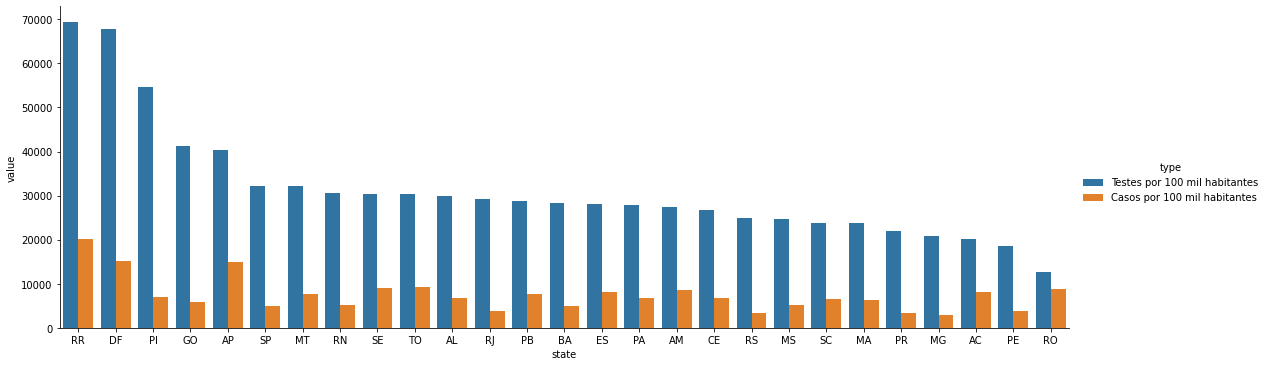

In [79]:

plot_sum = casos_x_testagem_uf[['state','confirmed_100k','testes_100k']]

plot_sum = casos_x_testagem_uf.groupby(['state']).sum().reset_index()
plot_testes = plot_sum[['state','testes_100k']].copy()
plot_testes.columns = ['state','value']
plot_testes['type'] = 'Testes por 100 mil habitantes'

plot_casos = plot_sum[['state','confirmed_100k']].copy()
plot_casos.columns = ['state','value']
plot_casos['type'] = 'Casos por 100 mil habitantes'

plot_sum = pd.concat([plot_testes, plot_casos], ignore_index=True).sort_values(by=['type','value'], ascending=False)


sns.catplot(x="state", y="value", hue="type", kind="bar", data=plot_sum, aspect=3)



In [ ]:
plot_sum = casos_x_testagem_uf[['state','confirmed_100k','testes_100k']]

plot_sum = casos_x_testagem_uf.groupby(['state']).sum().reset_index()
plot_testes = plot_sum[['state','testes_100k']].copy()
plot_testes.columns = ['state','value']
plot_testes['type'] = 'Testes por 100 mil habitantes'

plot_casos = plot_sum[['state','confirmed_100k']].copy()
plot_casos.columns = ['state','value']
plot_casos['type'] = 'Casos por 100 mil habitantes'

plot_sum = pd.concat([plot_testes, plot_casos], ignore_index=True).sort_values(by=['type','value'], ascending=False)


sns.catplot(x="state", y="value", hue="type", kind="bar", data=plot_sum, aspect=3)

#### Progressão Testes x Casos SARS-Cov2

Nesta análise avaliou-se a progressão de três meses de Testes efetuados para cada 100 mil habitantes em relação a quantidade casos observados no mesmo mês, agrupados por unidade da federação. Observou-se uma tendência aumento na quantidade de testes em todas unidades da federação. 

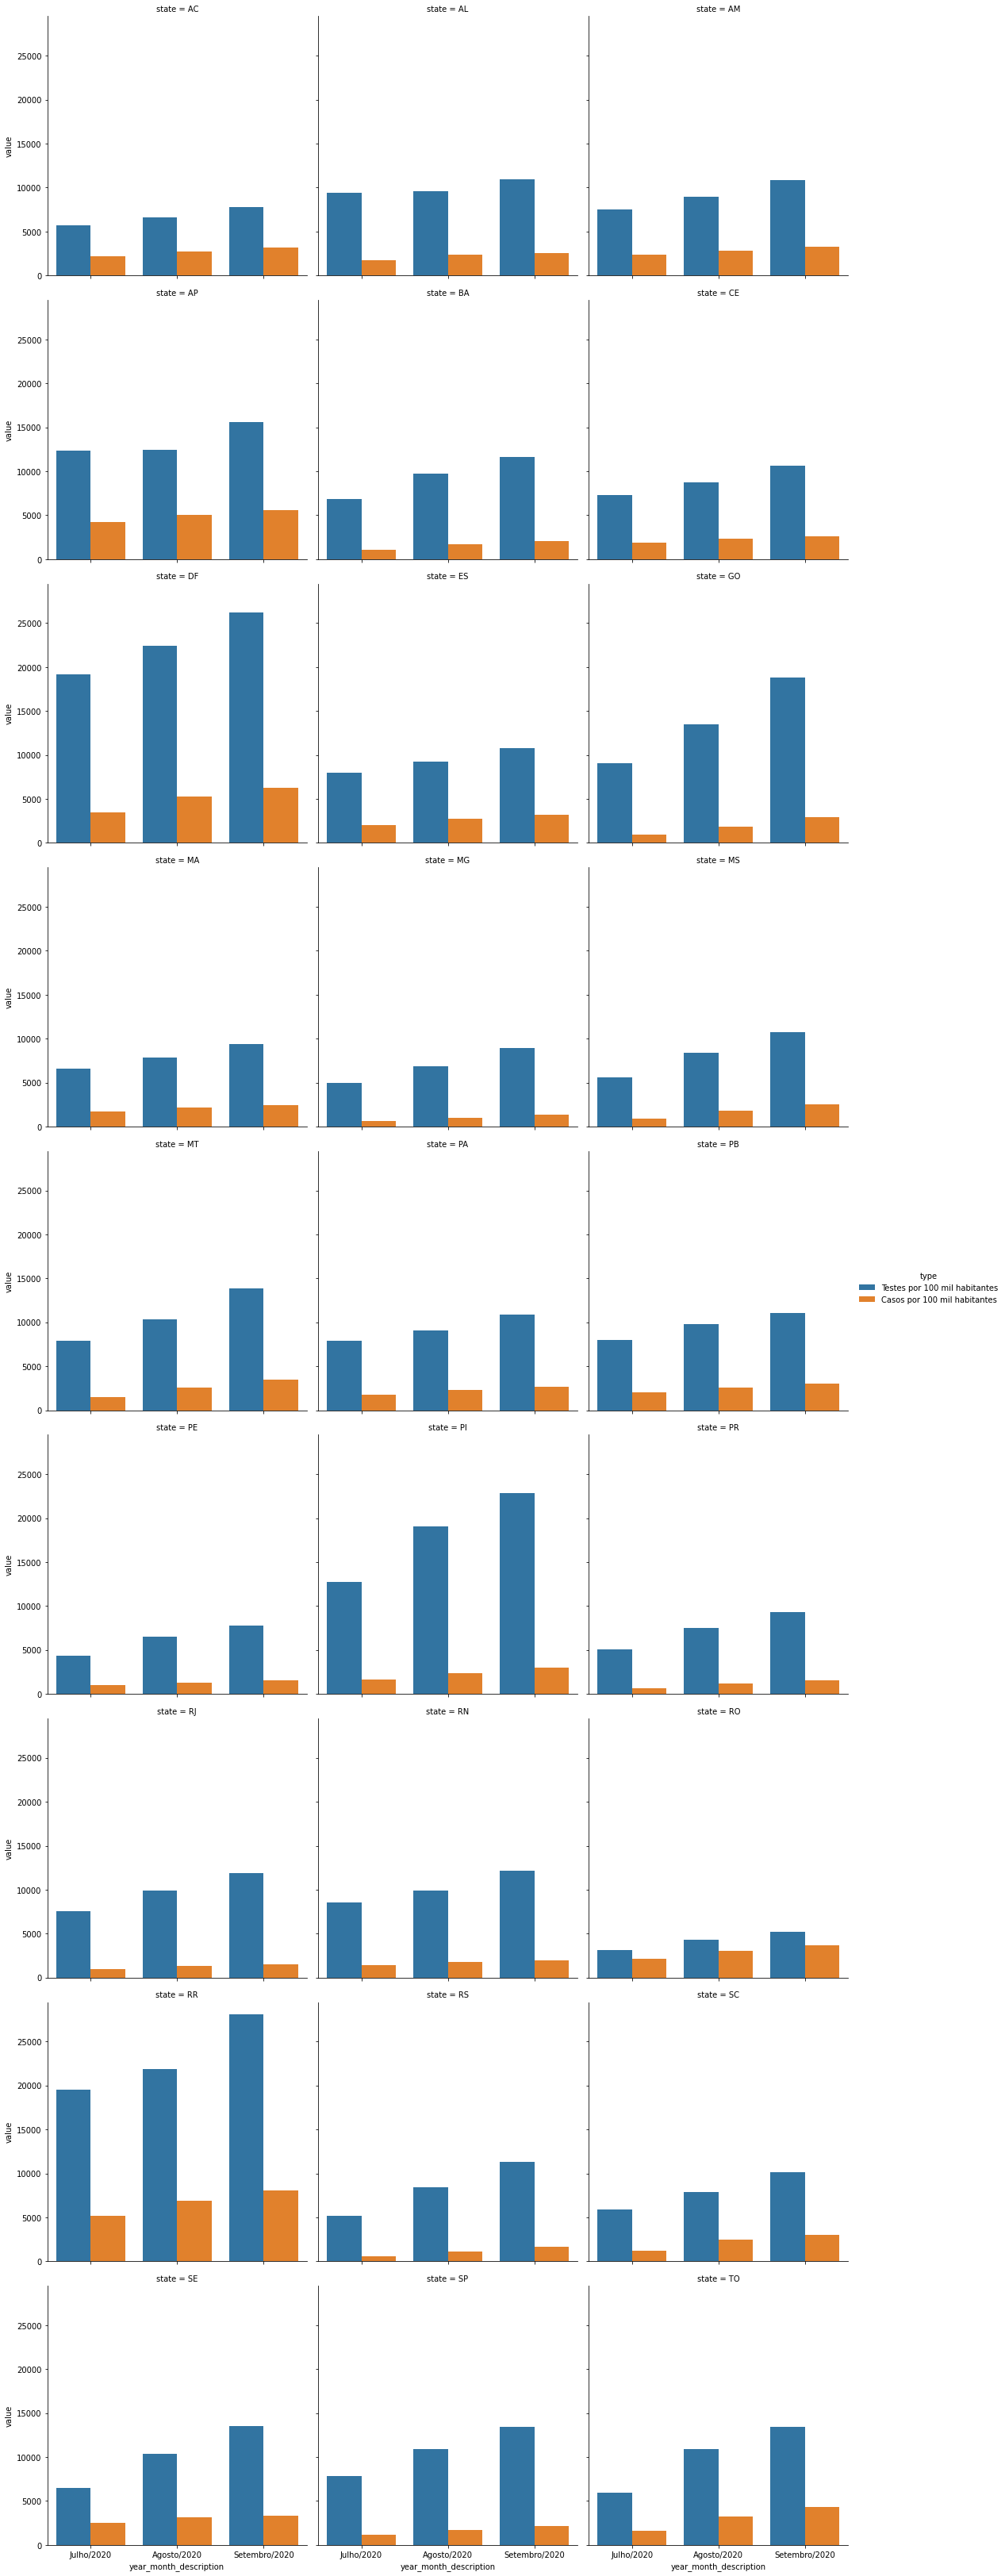

In [82]:
plot_testes = casos_x_testagem_uf[['state','state_title','year_month_description','testes_100k']].copy()
plot_testes.columns = ['state','state_title','year_month_description','value']
plot_testes['type'] = 'Testes por 100 mil habitantes'
plot_casos = casos_x_testagem_uf[['state','state_title','year_month_description','confirmed_100k']].copy()
plot_casos.columns = ['state','state_title','year_month_description','value']
plot_casos['type'] = 'Casos por 100 mil habitantes'
plot_all = pd.concat([plot_testes, plot_casos], ignore_index=True)

sns.catplot(x="year_month_description", y="value", col='state', hue="type", kind="bar", col_wrap=3, data=plot_all)



#### Comparativo Testes x Diferença de Casos SARS-Cov2 entre Meses

A progressão totais dos casos também foi avaliada pela observação da diferença de casos entre dois meses para cada unidade da federação. Isto é, a soma das diferenças entre a quantidade de casos do mês atual e o mês anterior. A distribuição destas diferenças é análoga a primeira análise, de forma que as duas unidades da federação que tiveram o maior acúmulo de diferença foram aquelas que mais testaram.

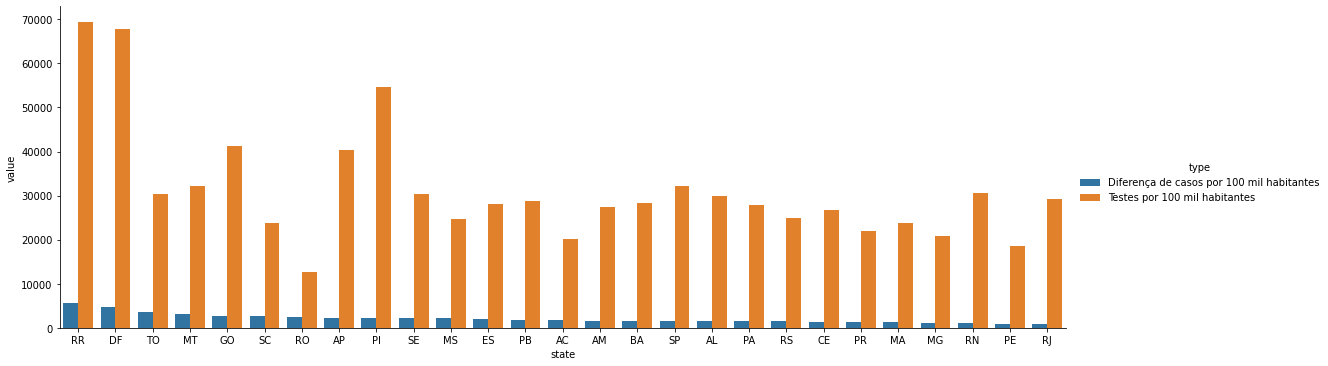

In [80]:
plot_sum_diff = casos_x_testagem_uf[['state','confirmed_diff_100k','testes_100k']]

plot_sum_diff = casos_x_testagem_uf.groupby(['state']).sum().reset_index()
plot_testes = plot_sum_diff[['state','testes_100k']].copy()
plot_testes.columns = ['state','value']
plot_testes['type'] = 'Testes por 100 mil habitantes'

plot_casos = plot_sum_diff[['state','confirmed_diff_100k']].copy()
plot_casos.columns = ['state','value']
plot_casos['type'] = 'Diferença de casos por 100 mil habitantes'

plot_sum_diff = pd.concat([plot_testes, plot_casos], ignore_index=True).sort_values(by=['type','value'], ascending=[True, False])


sns.catplot(x="state", y="value", hue="type", kind="bar", data=plot_sum_diff, aspect=3)


#### Progressão Total de Testagem Mês Anterior x Total de Casos SARS-Cov2 

Esta análise apresenta a progressão comparativa da quantidade casos registrados em um mês contra a quantidade de testes efetuados no mês anterior aos casos registrados. Isto é, tenta comparar visualmente se a testagem efetuada em um mês anterior apresentou um efeito na quantidade de casos do mês observado. Neste casos foi possível identificar visualmente um leve aumento dos casos em relaçação ao total de testes no mês anterior. 

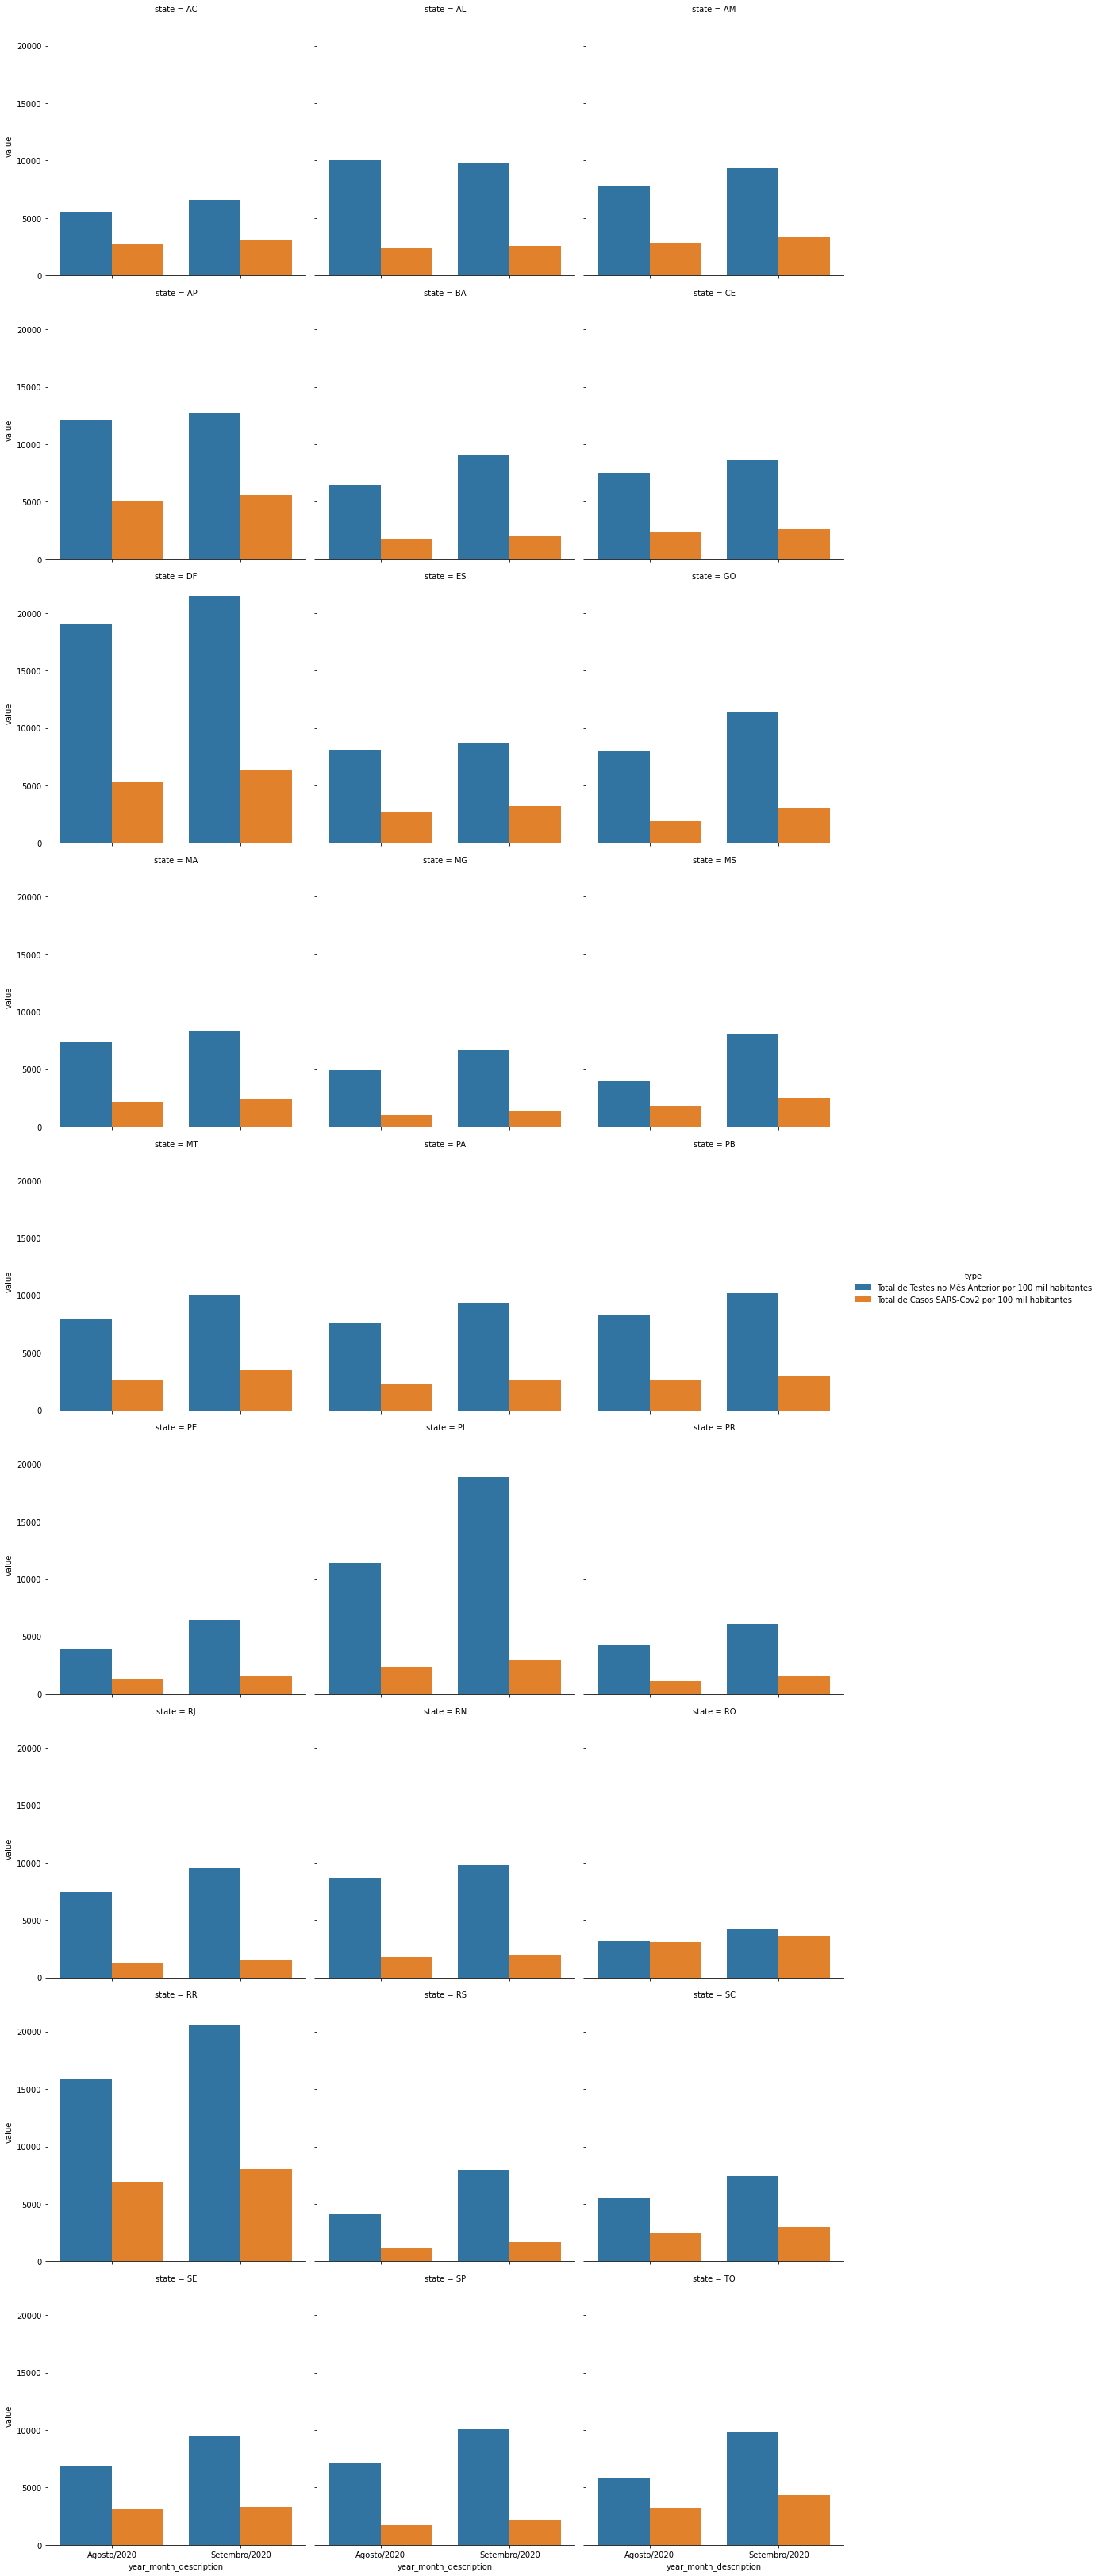

In [171]:
plot_selecao = casos_x_testagem_uf.query("year_month > 202007")

plot_testes_anterior = plot_selecao[['state','state_title','year_month_description','testes_mes_anterior_100k']].copy()
plot_testes_anterior.columns = ['state','state_title','year_month_description','value']
plot_testes_anterior['type'] = "Total de Testes no Mês Anterior por 100 mil habitantes"

plot_diff = plot_selecao[['state','state_title','year_month_description','confirmed_100k']].copy()
plot_diff.columns = ['state','state_title','year_month_description','value']
plot_diff['type'] = 'Total de Casos SARS-Cov2 por 100 mil habitantes'

plot_all = pd.concat([plot_testes_anterior, plot_diff], ignore_index=True)

sns.catplot(x="year_month_description", y="value", col='state', hue="type", kind="bar", col_wrap=3, data=plot_all)

#### Progressão Total de Testagem Mês Anterior x Diferença de Casos SARS-Cov2 entre Meses

Similarmente a análise anterior, esta análise apresenta a progressão comparativa da diferença casos registrados no mês contra a quantidade de testes efetuados no mês anterior aos casos observados. Aqui também se tenta comparar visualmente se a testagem efetuada em um mês anterior apresentou um efeito na progressão de casos dos mese observados. Neste caso foi possível observar uma leve redução na diferença de registros de casos entre meses em alguns estados, dando a entender que a progressão diminuiu. 

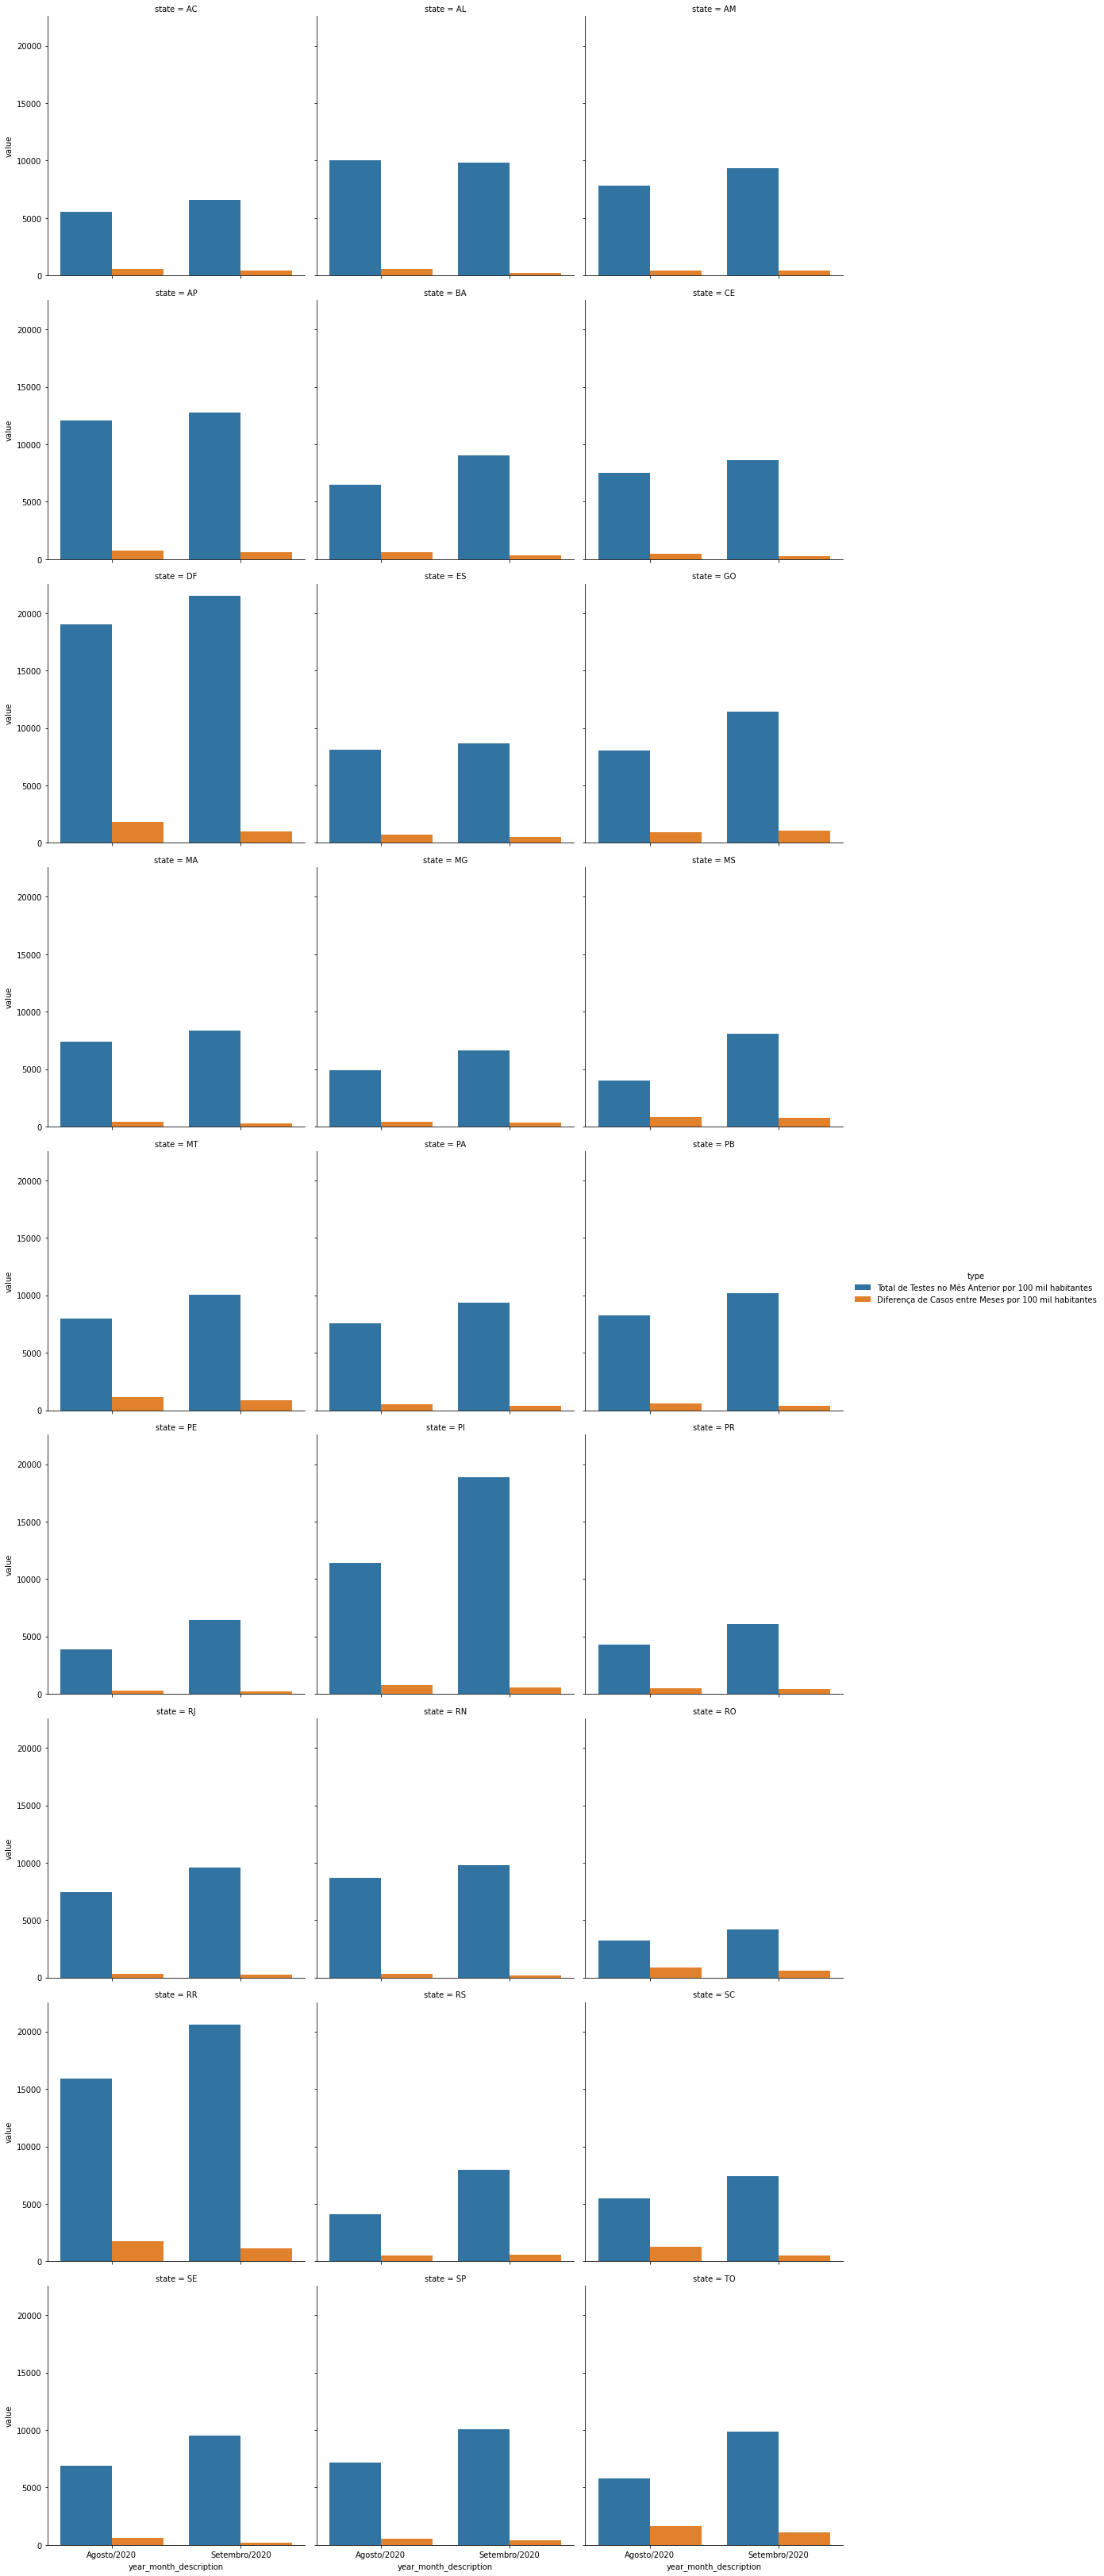

In [155]:
plot_selecao = casos_x_testagem_uf.query("year_month > 202007")

plot_testes_anterior = plot_selecao[['state','state_title','year_month_description','testes_mes_anterior_100k']].copy()
plot_testes_anterior.columns = ['state','state_title','year_month_description','value']
plot_testes_anterior['type'] = "Total de Testes no Mês Anterior por 100 mil habitantes"

plot_diff = plot_selecao[['state','state_title','year_month_description','confirmed_diff_100k']].copy()
plot_diff.columns = ['state','state_title','year_month_description','value']
plot_diff['type'] = 'Diferença de Casos entre Meses por 100 mil habitantes'

plot_all = pd.concat([plot_testes_anterior, plot_diff], ignore_index=True)

sns.catplot(x="year_month_description", y="value", col='state', hue="type", kind="bar", col_wrap=3, data=plot_all)

Existe uma ligeira queda na diferença entre meses conforme a quantidade de testes aumentam

### Avaliando a Correlação entre Testagem e Casos SARS-Cov2

Como forma de avaliar a relação entre as variáveis relacionadas a testagem àquelas relacionadas a casos de contágio, efetuo-se um teste correlação Pearson [11] entre as variáveis *Teste Mês Anterior por 100 mil Habitantes*, *Teste por 100 mil Habitantes*, *Diferença entre Casos Mês Anterior por 100 mil habitantes*, *Total de Casos por 100 mil habitantes*. Como resultado, observou-se uma correlação forte (maior que 0.7) entre as variáveis *Teste Mês Anterior por 100 mil Habitantes* e *Total de Casos por 100 mil habitantes*.


In [168]:
plot_selecao = casos_x_testagem_uf.query("year_month > 202007")[['testes_mes_anterior_100k','testes_100k','confirmed_diff_100k','confirmed_100k']]

In [165]:
correlacao = plot_selecao.corr()
correlacao

,testes_mes_anterior_100k,testes_100k,confirmed_diff_100k,confirmed_100k
testes_mes_anterior_100k,1.000000,0.943584,0.373889,0.745135
testes_100k,0.943584,1.000000,0.483232,0.710645
confirmed_diff_100k,0.373889,0.483232,1.000000,0.577774
confirmed_100k,0.745135,0.710645,0.577774,1.000000


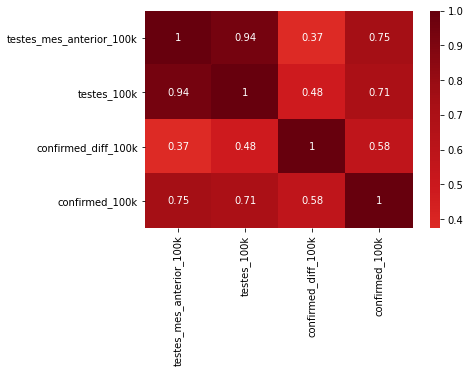

In [166]:
sns.heatmap(correlacao, cmap="Reds", center=0, annot=True)

## Considerações Finais e Estudos Futuros

Embora o presente estudo não possa ser entendido como conclusivo, uma vez que a avaliação efetiva da hipótese sugerida dependa de uma uma maior quantidade de observações relacionadas a dados de testagem nas unidades federativas brasileiras, foi possível identificar uma correlação forte entre a quantidade de casos por 100 mil habitantes e a quantidade de testes efetuados em um mês anterior. Embora esta relação possa ser classificada como espúria devido a falta de dados relacionados, algumas avaliações efetudas neste mesmo estudo sugerem esta relação deva continuar a ser avaliada em trabalhos futuros. 

Por exemplo, os comparativos *Testes x Casos SARS-Cov2* e *Testes x Diferença de Casos SARS-Cov2* demonstram que os dois estados que mais efetuaram testes a cada 100 mil habitantes foram os mesmos que tiveram a maior diferença acumulada entre meses e também maior número de casos. Isso pode indicar que o número de casos apresentado nos boletins podem não representar a realidade já que a ausência de testes deve mascarar contágios assintomáticos que não foram testados, o que não ocorre em unidades federativas que efetuam mais testes.

Como trabalhos futuros sugere-se efetuar comparativos entre a relação da progressão dos casos e os diferentes tipos de testes, bem como repetir o estudo quando maiores informações de testes forem disponibilizadas pelo IBGE em seu site.

## Referências

1. https://coronavirus.rs.gov.br/o-que-e
1. https://www.paho.org/bra/index.php?option=com_content&view=article&id=6113:brasil-confirma-primeiro-caso-de-infeccao-pelo-novo-coronavirus&Itemid=812
1. https://www.unasus.gov.br/noticia/organizacao-mundial-de-saude-declara-pandemia-de-coronavirus
1. https://www.who.int/publications/i/item/strategic-preparedness-and-response-plan-for-the-new-coronavirus
1. http://portalarquivos2.saude.gov.br/images/pdf/2020/fevereiro/21/2020-02-21-Boletim-Epidemiologico03.pdf
1. https://www.ibge.gov.br/estatisticas/investigacoes-experimentais/estatisticas-experimentais/27947-divulgacao-mensal-pnadcovid2?t=resultados&utm_source=covid19&utm_medium=hotsite&utm_campaign=covid_19
1. https://brasil.io/dataset/covid19/caso/
1. https://coronavirus.rs.gov.br/upload/arquivos/202008/07133948-nota-informativa-15-errata-07-08-2020.pdf
1. http://coronavirus.saude.mg.gov.br/blog/65-como-funcionam-os-testes-para-coronavirus
1. https://r4ds.had.co.nz/tidy-data.html
1. https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

